## Lending Club Case Study

This project explores how to identify risky loan applicants using Exploratory Data Analysis (EDA). We analyze past loan data to understand factors that influence whether a person will default on a loan.

#### Import Required Libraries

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

#### Data Extracting - Load CSV file into data frame

In [2]:
loandf=pd.read_csv('C:\\Users\\Desktop\\loan.csv',low_memory=False);

In [3]:
## Increasing the row size as many of the results are getting hidden ##
## due to large number of rows return as part of compytation. ##

pd.options.display.max_rows = 20000

#### Analyze dataframe head post loading the CSV File

In [4]:
loandf.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Data Cleaning

##### Check percentage of null values in each coloums in loan datafarme

In [6]:
loandf.isnull().sum()/len(loandf)*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

##### We can see that there are coloums which are not having any values (100% null values)
##### and high percent of null values:
#####   1. 60%+ [mths_since_last_delinq]
#####  2. 90%+ [mths_since_last_record, next_pymnt_d]
##### We need to drop these coloums from dataframe

In [7]:

## getting all coloms have 100% null values and droping them 
loandf.dropna(axis=1,how='all',inplace=True)

## droping other coloums with high percentage of null values.
drop_list= ['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d']
thisFilter = loandf.filter(drop_list)
loandf.drop(thisFilter, inplace=True, axis=1)
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
## Droping single value colums
for column in loandf.columns:
    if loandf[column].value_counts().shape[0]==1:
            print("*****"+column+"*******")
            loandf.drop([column],axis=1,inplace=True)

*****pymnt_plan*******
*****initial_list_status*******
*****collections_12_mths_ex_med*******
*****policy_code*******
*****application_type*******
*****acc_now_delinq*******
*****chargeoff_within_12_mths*******
*****delinq_amnt*******
*****tax_liens*******


#### Data Manipulation

In [9]:
## Since we can see that there are more that 25000 distinct employee title so we cannot categorize them into relvent bins
## and thus title wise loan defaulter will not be help full rather we can use employee length for same 
## id, member_id, url,desc,title are not useful for defaulter analysis 
## we can give analysis at state level rather than zip_code level that, that can be more helpful

drop_list= ['id','member_id','url','desc','emp_title','title','zip_code']
thisFilter = loandf.filter(drop_list)
loandf.drop(thisFilter, inplace=True, axis=1)
loandf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [10]:
info_which_are_not_available_at_loan_approval_time=['installment',
                                                    'delinq_2yrs',
                                                    'inq_last_6mths',
                                                    'open_acc',
                                                    'total_acc',
                                                    'out_prncp',
                                                    'out_prncp_inv',
                                                    'total_pymnt',
                                                    'total_pymnt_inv',
                                                    'total_rec_prncp',
                                                    'total_rec_int',
                                                    'total_rec_late_fee',
                                                    'recoveries',
                                                    'collection_recovery_fee',
                                                    'last_pymnt_d',
                                                    'last_pymnt_amnt',
                                                    'last_credit_pull_d',                                                    
                                                   ]
thisFilter = loandf.filter(info_which_are_not_available_at_loan_approval_time)
loandf.drop(thisFilter, inplace=True, axis=1)
loandf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [11]:
loandf.isnull().sum()/len(loandf)*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

In [12]:
loandf.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [13]:
loandf.emp_length.fillna(loandf.emp_length.mode()[0],inplace=True)

C:\Users\RS24050\AppData\Local\Temp\ipykernel_16856\838941497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loandf.emp_length.fillna(loandf.emp_length.mode()[0],inplace=True)


In [14]:
loandf.emp_length.value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [15]:
## Convert intrest rate to float

In [16]:
loandf["int_rate"]=loandf["int_rate"].apply(lambda x : float(x[0:-1] if x[-1]=='%' else x ))

In [17]:
loandf["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [18]:
loandf.isnull().sum()/len(loandf)*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

In [19]:
loandf[loandf.revol_util.isna()][['loan_status']].value_counts()

loan_status
Fully Paid     34
Charged Off    16
Name: count, dtype: int64

In [20]:
loandf.shape

(39717, 21)

In [21]:
loandf.drop(loandf[loandf.revol_util.isna()].index, inplace=True)

In [22]:
loandf.shape

(39667, 21)

In [23]:
len(loandf[(loandf.pub_rec_bankruptcies.isna()) & (loandf.loan_status=="Charged Off")])

118

In [24]:
len(loandf[(loandf.pub_rec_bankruptcies.isna()) & (loandf.loan_status!="Charged Off")])

579

In [25]:
loandf[(~loandf.pub_rec_bankruptcies.isna()) & (loandf.loan_status=="Charged Off")][['pub_rec_bankruptcies']].value_counts()

pub_rec_bankruptcies
0.0                     5125
1.0                      366
2.0                        2
Name: count, dtype: int64

In [26]:
#loandf.drop(['pub_rec_bankruptcies'],axis=1,inplace=True)
loandf[(~loandf.pub_rec_bankruptcies.isna()) & (loandf.loan_status!="Charged Off")][['pub_rec_bankruptcies']].value_counts()

pub_rec_bankruptcies
0.0                     32165
1.0                      1307
2.0                         5
Name: count, dtype: int64

In [27]:
loandf.pub_rec_bankruptcies.fillna(loandf.pub_rec_bankruptcies.mode()[0],inplace=True)

C:\Users\RS24050\AppData\Local\Temp\ipykernel_16856\4287362101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loandf.pub_rec_bankruptcies.fillna(loandf.pub_rec_bankruptcies.mode()[0],inplace=True)


In [28]:
loandf.pub_rec_bankruptcies.isna().sum()

np.int64(0)

In [29]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39667 non-null  int64  
 1   funded_amnt           39667 non-null  int64  
 2   funded_amnt_inv       39667 non-null  float64
 3   term                  39667 non-null  object 
 4   int_rate              39667 non-null  float64
 5   grade                 39667 non-null  object 
 6   sub_grade             39667 non-null  object 
 7   emp_length            39667 non-null  object 
 8   home_ownership        39667 non-null  object 
 9   annual_inc            39667 non-null  float64
 10  verification_status   39667 non-null  object 
 11  issue_d               39667 non-null  object 
 12  loan_status           39667 non-null  object 
 13  purpose               39667 non-null  object 
 14  addr_state            39667 non-null  object 
 15  dti                   39

In [30]:
## Extracting month and year
loandf["issue_month"]=loandf['issue_d'].apply(lambda dt: dt.split("-")[0])     
loandf["issue_year"]=loandf['issue_d'].apply(lambda dt: dt.split("-")[1])  

In [31]:
loandf.dti.describe()

count    39667.000000
mean        13.318704
std          6.676975
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [32]:
#[0-5)[5-10)[10,15)[15,20)[20,25)[25,30)
def dticut(dti):
    if dti>=0 and dti<5 :
        return "0-5%"
    elif dti>=5 and dti<10 :
        return "5-10%"
    elif dti>=10 and dti<15:
        return "10-15%"
    elif dti>=15 and dti<20:
        return "15-20%"
    elif dti>=20 and dti<25:
        return "20-25%"
    elif dti>=25 and dti<30:
        return "25-30%"
    else:
        return "30+%"
loandf['dti_group']=loandf.dti.apply(lambda x: dticut(x))

In [33]:
#[0-5)[5-10)[10,15)[15,20)[20,25)
def intrest_rate_cut(int_rate):
    if int_rate>=0 and int_rate<5 :
        return "0-5%"
    elif int_rate>=5 and int_rate<10 :
        return "5-10%"
    elif int_rate>=10 and int_rate<15:
        return "10-15%"
    elif int_rate>=15 and int_rate<20:
        return "15-20%"
    else:
        return "20-25%"   
loandf['intrest_rate_group']=loandf.int_rate.apply(lambda x: intrest_rate_cut(x))

<Axes: ylabel='annual_inc'>

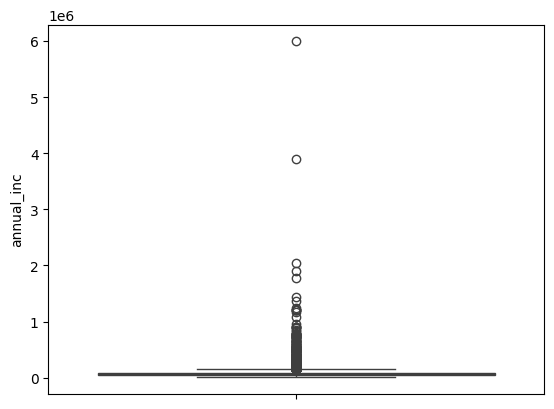

In [34]:
sns.boxplot(y=loandf.annual_inc)

In [35]:
loandf.annual_inc.describe()

count    3.966700e+04
mean     6.899952e+04
std      6.378947e+04
min      4.000000e+03
25%      4.051632e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [36]:
np.percentile(loandf.annual_inc,[25,75,50])

array([40516.32, 82400.  , 59000.  ])

In [37]:
qutile=np.percentile(loandf.annual_inc,[25,75])
iqr=qutile[1]-qutile[0]
iqr
hb=qutile[1]+( iqr*1.5)
loandf[(loandf.annual_inc>hb)][['annual_inc','loan_status']].sort_values(by="annual_inc",ascending=False)
loandf[(loandf.annual_inc>hb)].shape

(1842, 25)

In [38]:
loandf.drop(loandf[(loandf.annual_inc>hb)].index,inplace=True)

In [39]:
loandf[(loandf.annual_inc>hb)].shape

(0, 25)

In [40]:
hb

np.float64(145225.52000000002)

<Axes: ylabel='annual_inc'>

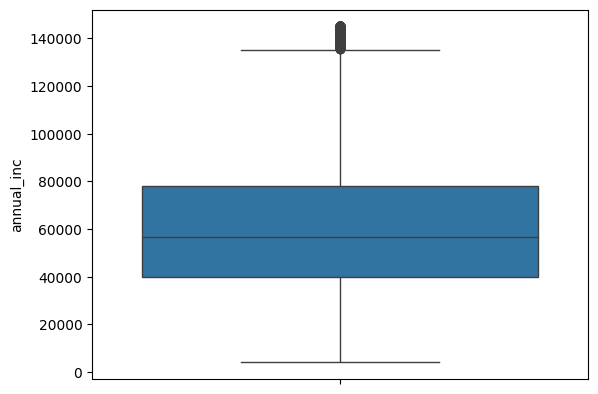

In [41]:
sns.boxplot(y=loandf.annual_inc)

<Axes: ylabel='loan_amnt'>

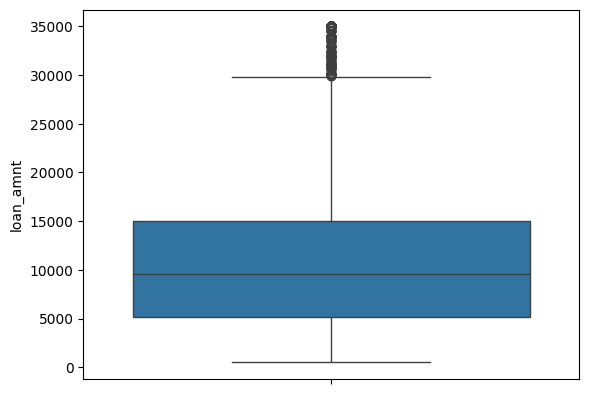

In [42]:
sns.boxplot(y=loandf.loan_amnt)

In [43]:
loandf[loandf.loan_amnt>32000].shape

(556, 25)

<Axes: ylabel='int_rate'>

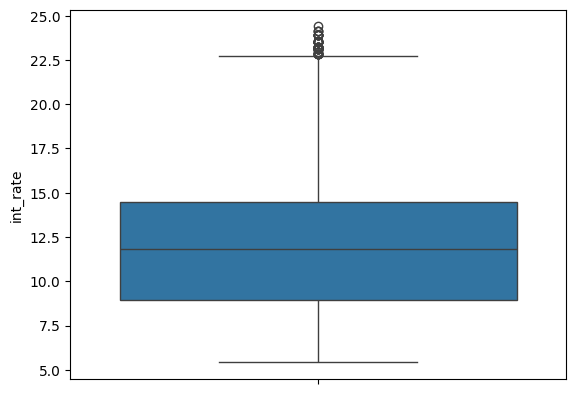

In [44]:
sns.boxplot(y=loandf.int_rate)

In [45]:
qutile=np.percentile(loandf.int_rate,[25,75])
iqr=qutile[1]-qutile[0]
iqr
hb=qutile[1]+( iqr*1.5)
hb

np.float64(22.740000000000002)

In [46]:
loandf.drop(loandf[(loandf.int_rate>hb)].index,inplace=True)

<Axes: ylabel='dti'>

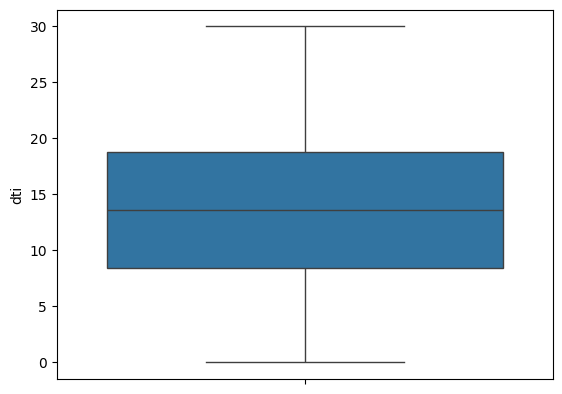

In [47]:
sns.boxplot(loandf.dti)

<Axes: xlabel='term', ylabel='count'>

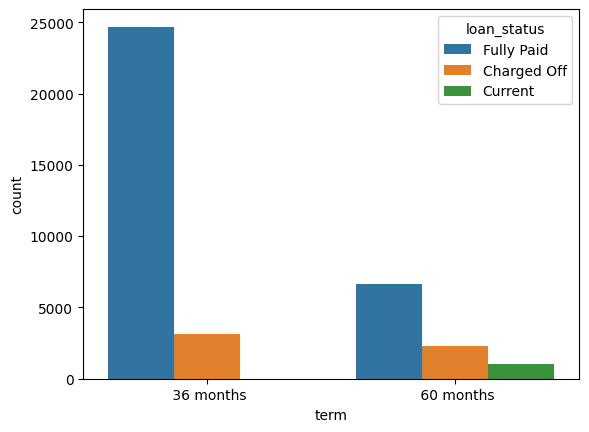

In [48]:
sns.countplot(x=loandf.term,hue=loandf.loan_status)

<Axes: xlabel='grade', ylabel='count'>

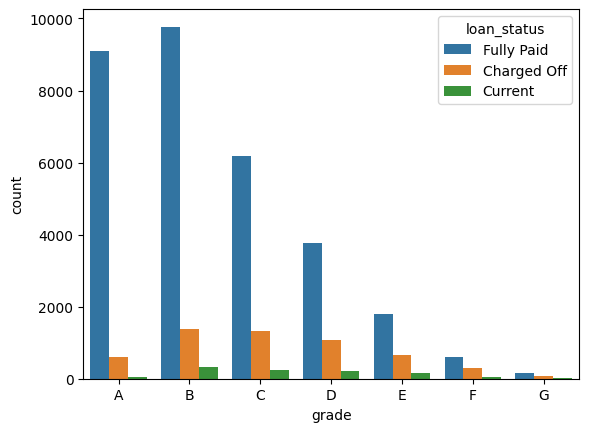

In [49]:
sns.countplot(x=loandf.grade,hue=loandf.loan_status,order=loandf.grade.value_counts().index.sort_values())

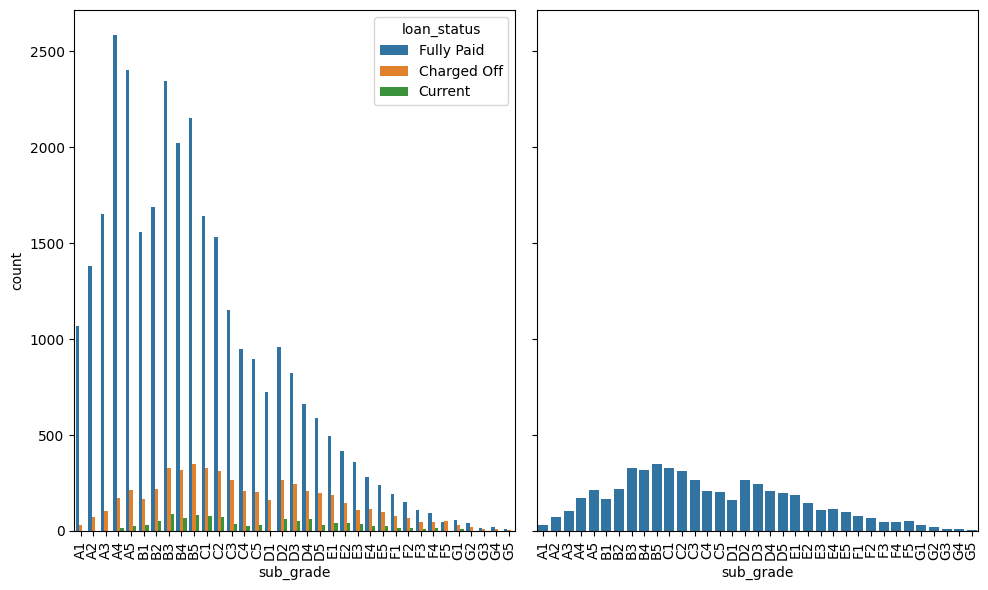

In [50]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=True)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.sub_grade,hue=loandf.loan_status,order=loandf.sub_grade.value_counts().index.sort_values(),ax=ax[0])

ch=loandf[loandf.loan_status=="Charged Off"]
sns.countplot(x=ch.sub_grade,order=sorted(ch.sub_grade.unique()),ax=ax[1])

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='emp_length', ylabel='count'>

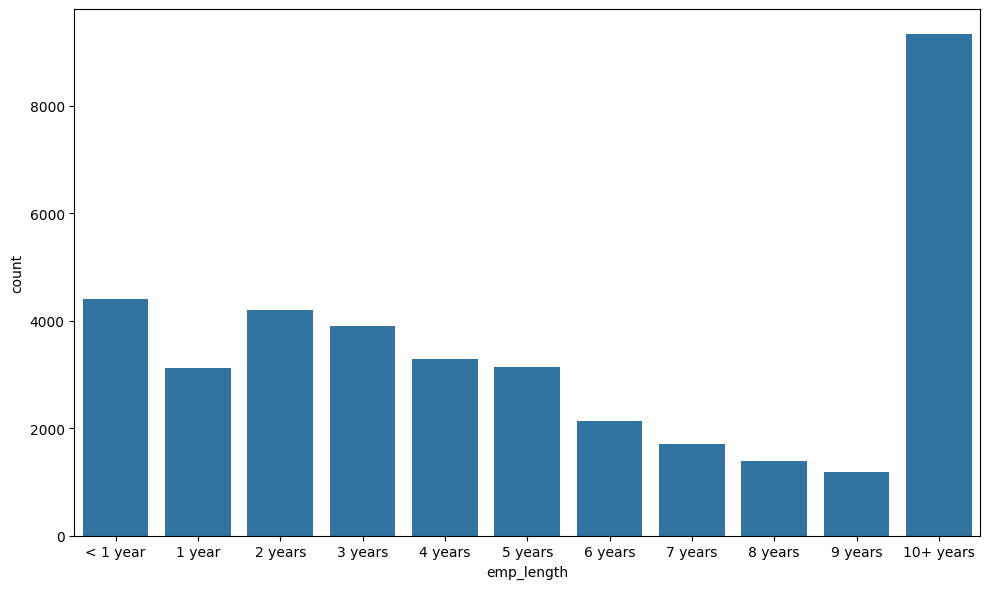

In [51]:
sns.countplot(x=loandf.emp_length,order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

In [52]:
loandf.home_ownership.value_counts()

home_ownership
RENT        18411
MORTGAGE    16338
OWN          2934
OTHER          91
NONE            3
Name: count, dtype: int64

In [53]:
# None is not a valid values for home ownership so we can  assign the equivalnet valid values which is OTHER

In [54]:
loandf["home_ownership"]=loandf.home_ownership.apply(lambda x : "OTHER" if x=="NONE" else x)

<Axes: xlabel='home_ownership', ylabel='count'>

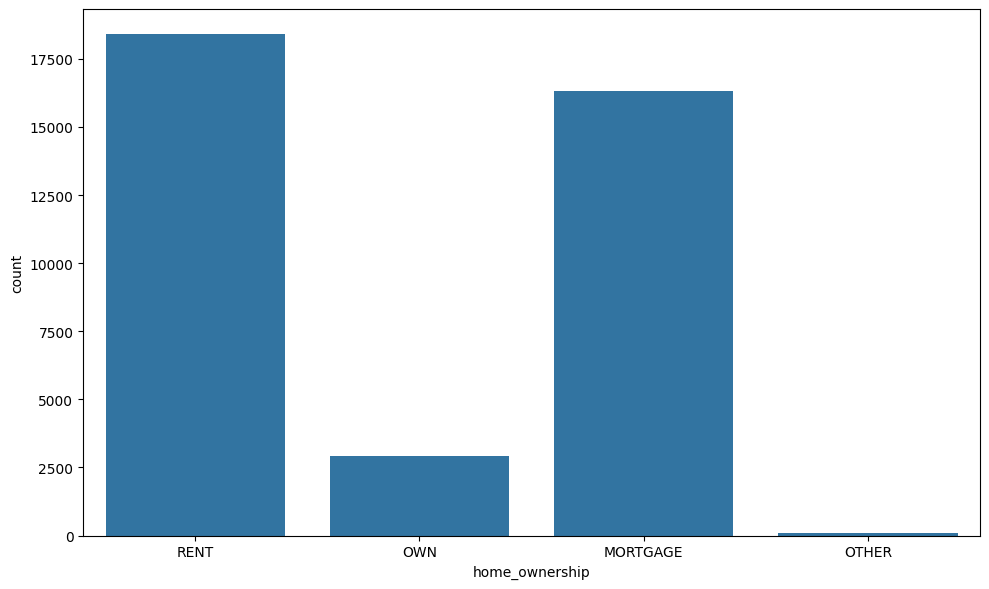

In [55]:
sns.countplot(x=loandf.home_ownership)

<Axes: xlabel='verification_status', ylabel='count'>

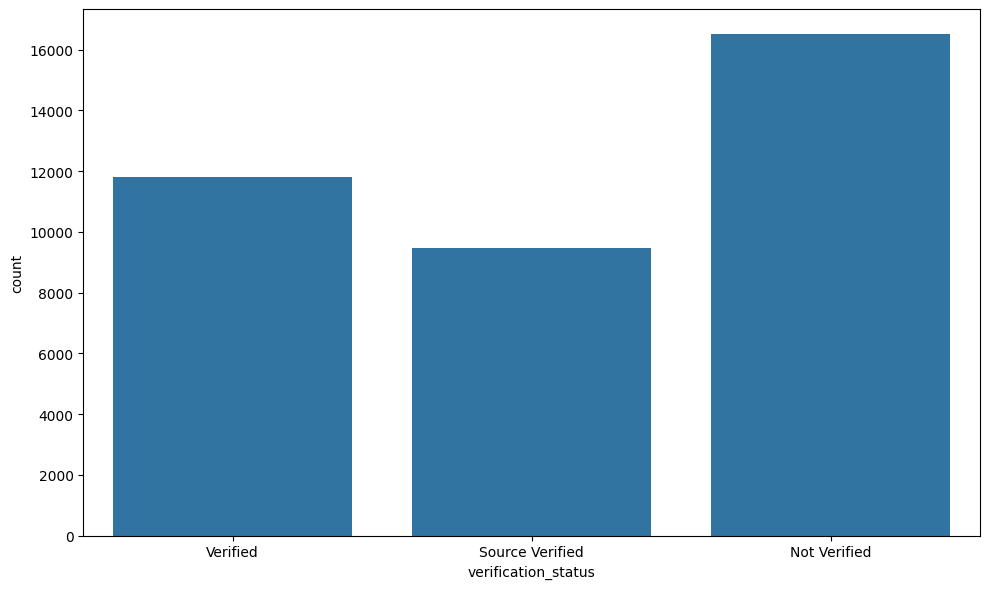

In [56]:
sns.countplot(x=loandf.verification_status)

<Axes: xlabel='issue_year', ylabel='count'>

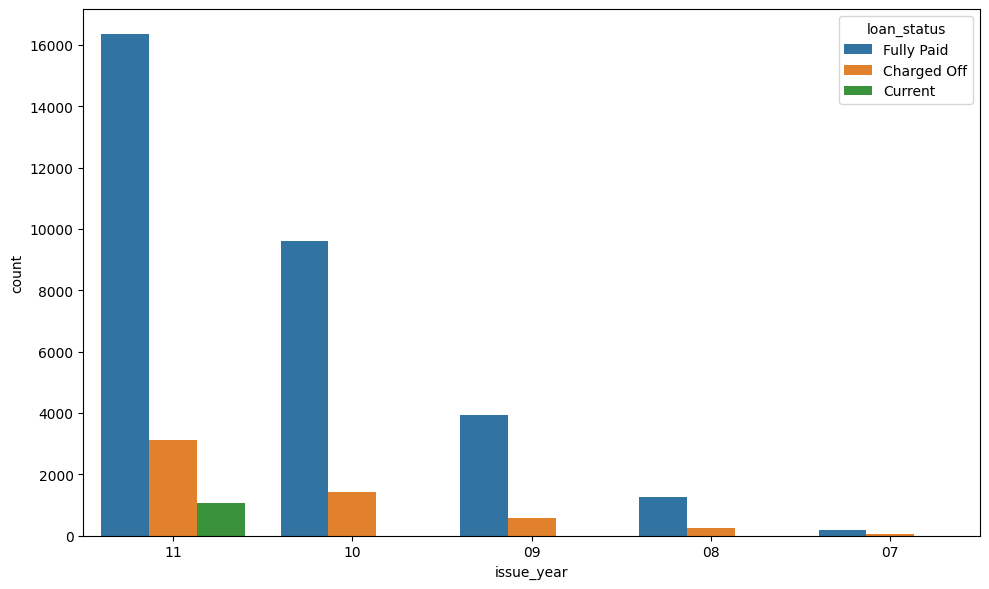

In [57]:
sns.countplot(x=loandf.issue_year,hue=loandf.loan_status)

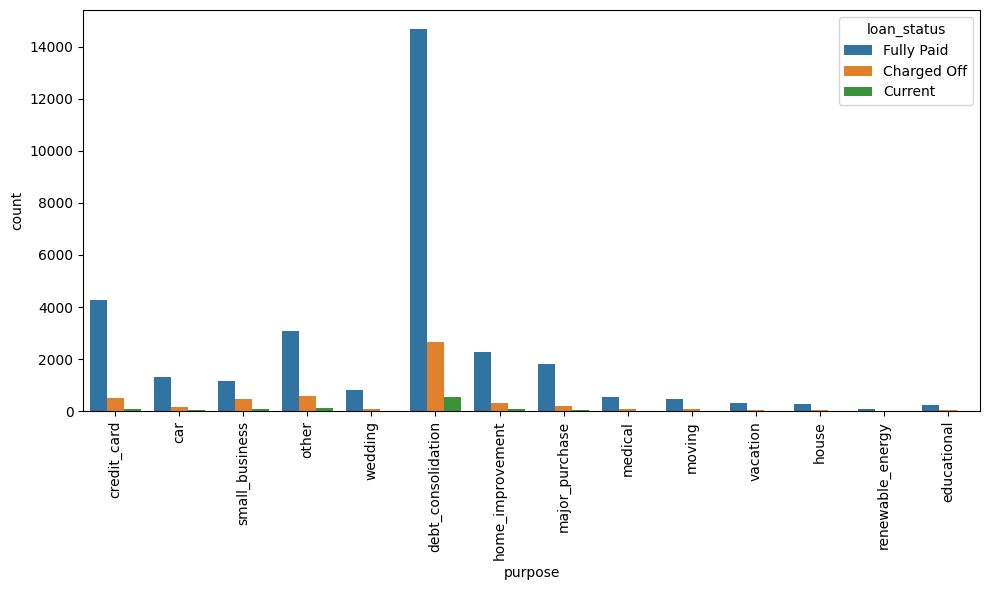

In [58]:
sns.countplot(x=loandf.purpose,hue=loandf.loan_status)
plt.xticks(rotation=90)
plt.show()

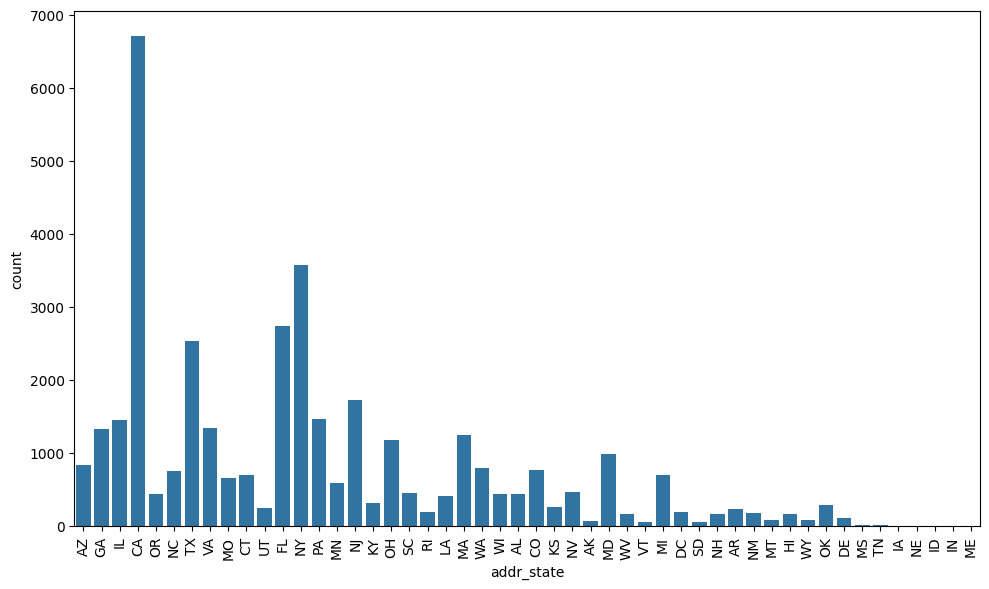

In [59]:
sns.countplot(x=loandf.addr_state)
plt.xticks(rotation=90)
plt.show()

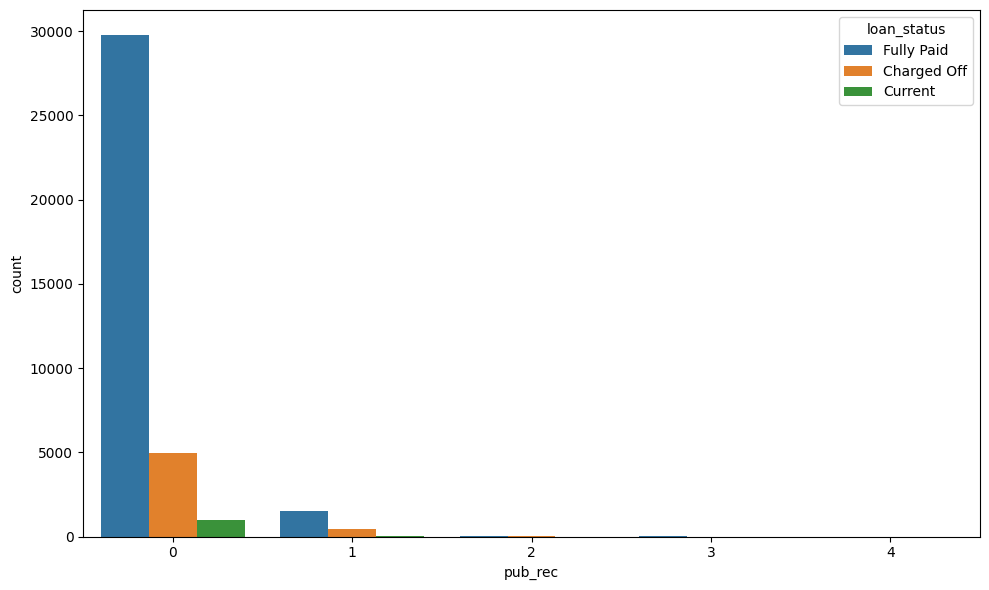

In [60]:
sns.countplot(x=loandf.pub_rec,hue=loandf.loan_status)
plt.show()

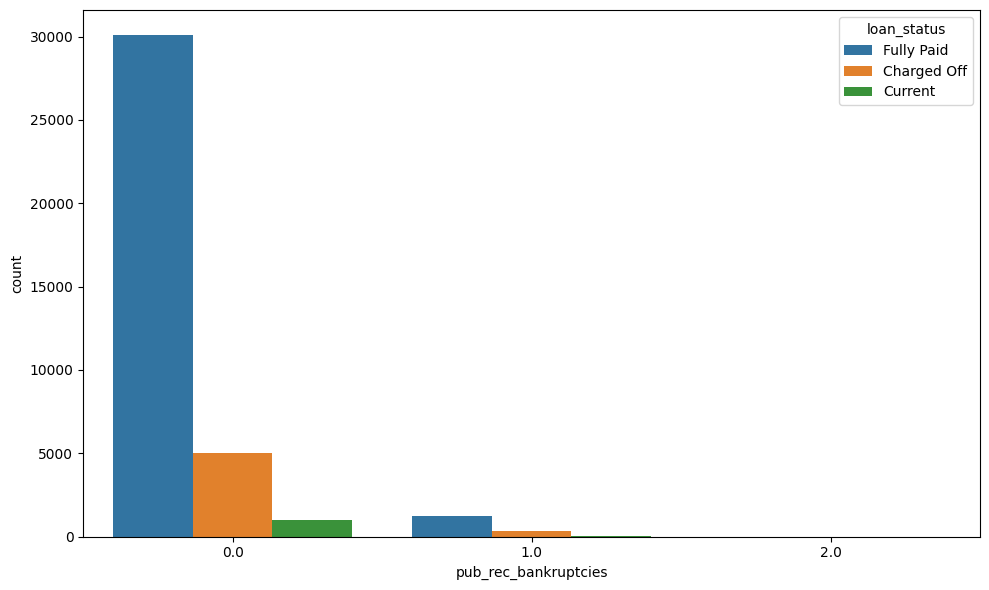

In [61]:
sns.countplot(x=loandf.pub_rec_bankruptcies,hue=loandf.loan_status)
plt.show()

## BiVariat Analysis

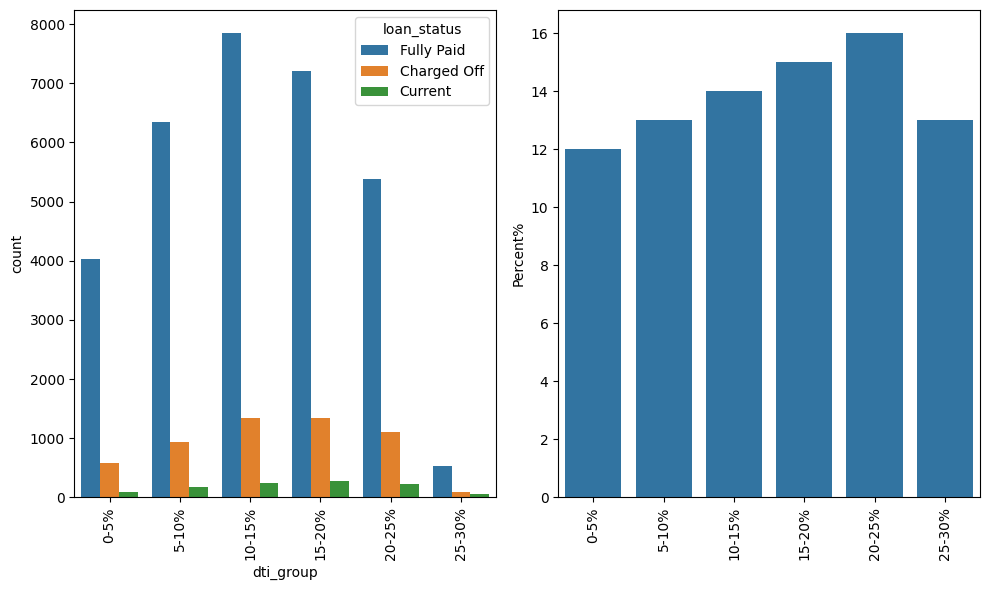

In [62]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.dti_group,hue=loandf.loan_status,order=["0-5%","5-10%","10-15%","15-20%","20-25%","25-30%"],ax=ax[0])

o=["0-5%","5-10%","10-15%","15-20%","20-25%","25-30%"]
per=[round((len(loandf[(loandf.dti_group==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.dti_group==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()


In [63]:
# we can se that as chances of getting default increase as the dti ratio increases.


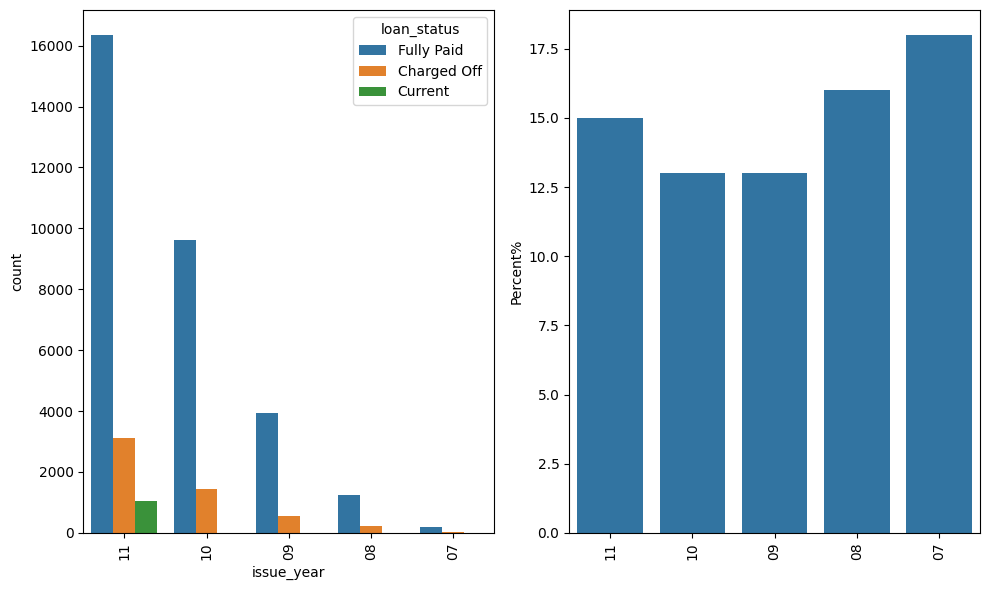

In [64]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.issue_year,hue=loandf.loan_status,ax=ax[0])

o=['11','10','09','08','07']
per=[round((len(loandf[(loandf.issue_year==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.issue_year==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

In [65]:
# We can see that major loans we taken in 2011 and 2010 but most of the relative
# loan defaulter  were there in 2007 and 2008 that is pre kicking of 2008 crices 
# and then again in 2011

<Axes: xlabel='issue_year', ylabel='count'>

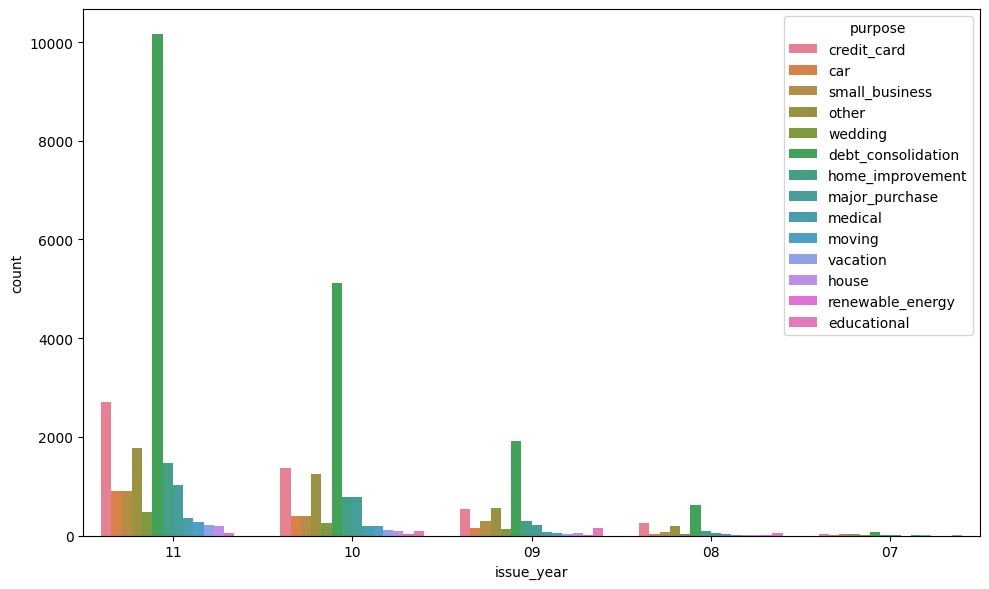

In [66]:
sns.countplot(x=loandf.issue_year,hue=loandf.purpose)

In [67]:
#from 2011 to 2008  major loans were taken for debt consolidation


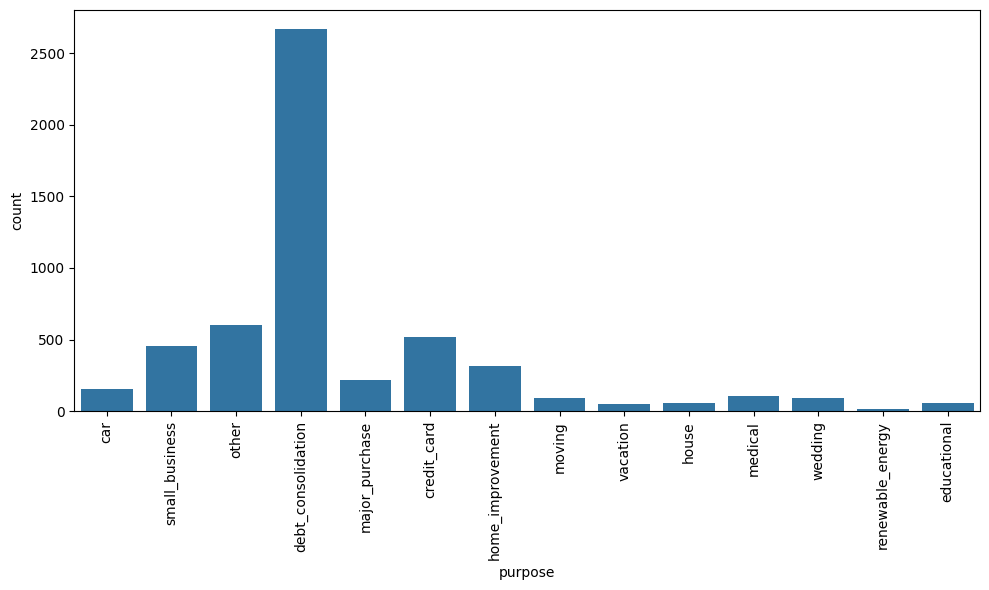

In [68]:
ch=loandf[loandf.loan_status=="Charged Off"]
sns.countplot(x=ch.purpose)
plt.xticks(rotation=90)
plt.show()

In [69]:
# loan takem for debt consolidation has high chances for defaulting.


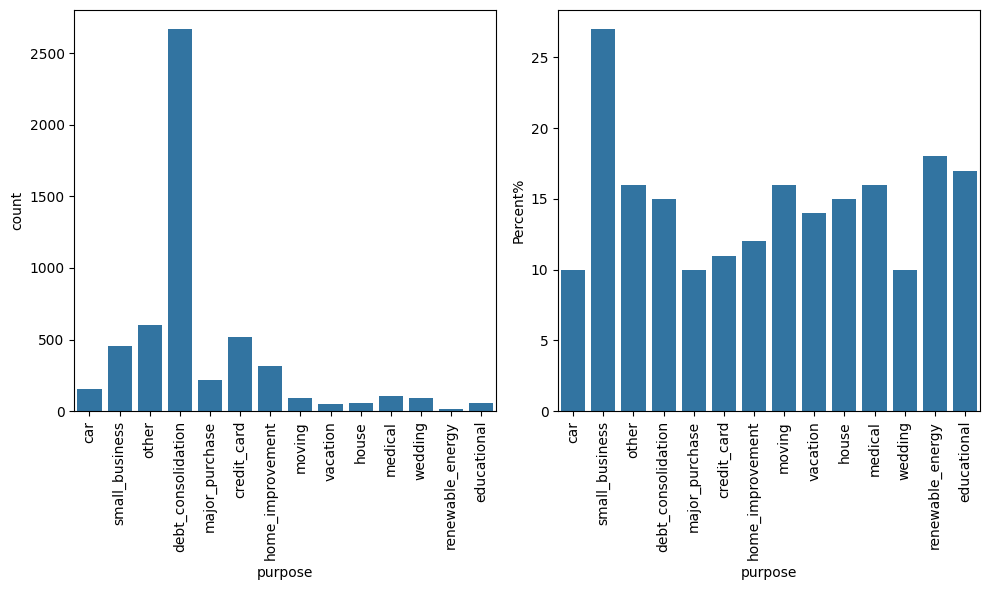

In [70]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
    
ch=loandf[loandf.loan_status=="Charged Off"]
sns.countplot(x=ch.purpose,ax=ax[0])

o=loandf.purpose.value_counts().index
per=[round((len(loandf[(loandf.purpose==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.purpose==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

In [71]:
o=loandf.purpose.value_counts().index
per=[{oo,round((len(loandf[(loandf.purpose==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.purpose==oo)]),2)*100} for oo in o]
per

[{15.0, 'debt_consolidation'},
 {11.0, 'credit_card'},
 {16.0, 'other'},
 {12.0, 'home_improvement'},
 {10.0, 'major_purchase'},
 {27.0, 'small_business'},
 {10.0, 'car'},
 {10.0, 'wedding'},
 {16.0, 'medical'},
 {16.0, 'moving'},
 {14.000000000000002, 'vacation'},
 {15.0, 'house'},
 {17.0, 'educational'},
 {18.0, 'renewable_energy'}]

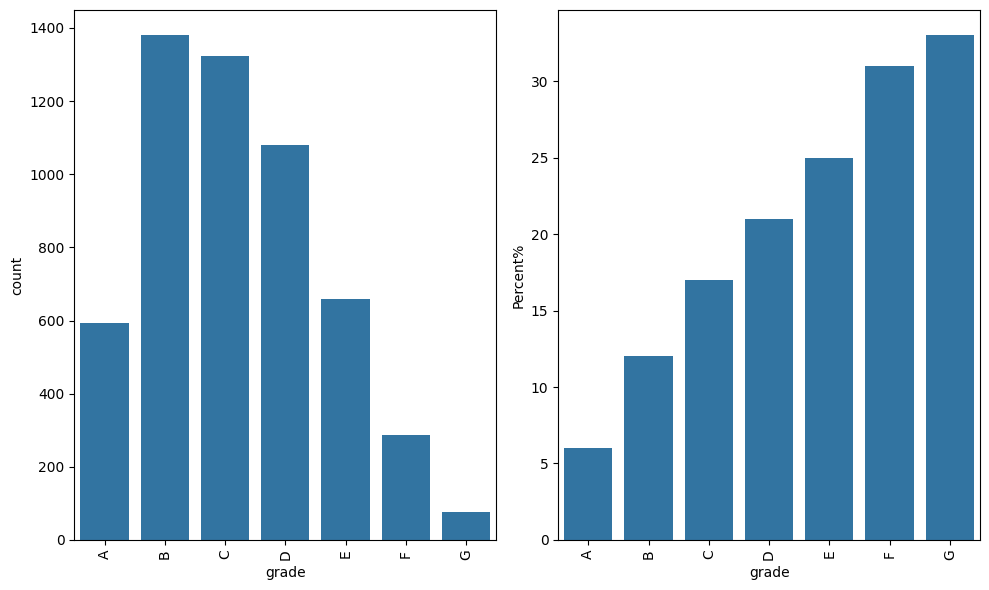

In [72]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
ch=loandf[loandf.loan_status=="Charged Off"]
sns.countplot(x=ch.grade,order=['A','B','C','D','E','F','G'],ax=ax[0])

o=loandf.grade.value_counts().index
per=[round((len(loandf[(loandf.grade==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.grade==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()



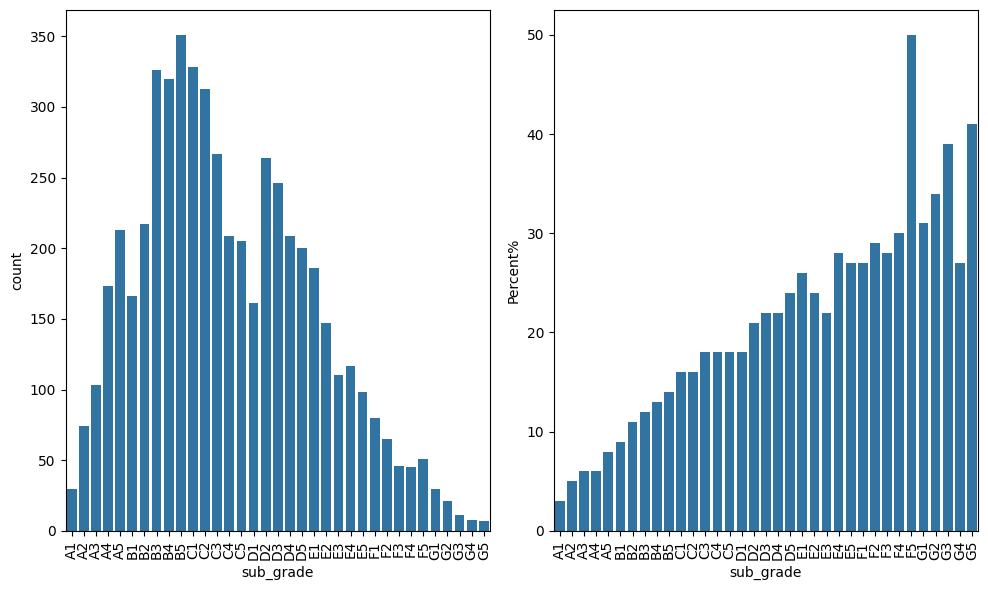

In [73]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
ch=loandf[loandf.loan_status=="Charged Off"]
sns.countplot(x=ch.sub_grade,order=sorted(ch.sub_grade.unique()),ax=ax[0])

o=loandf.sub_grade.value_counts().index
per=[round((len(loandf[(loandf.sub_grade==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.sub_grade==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

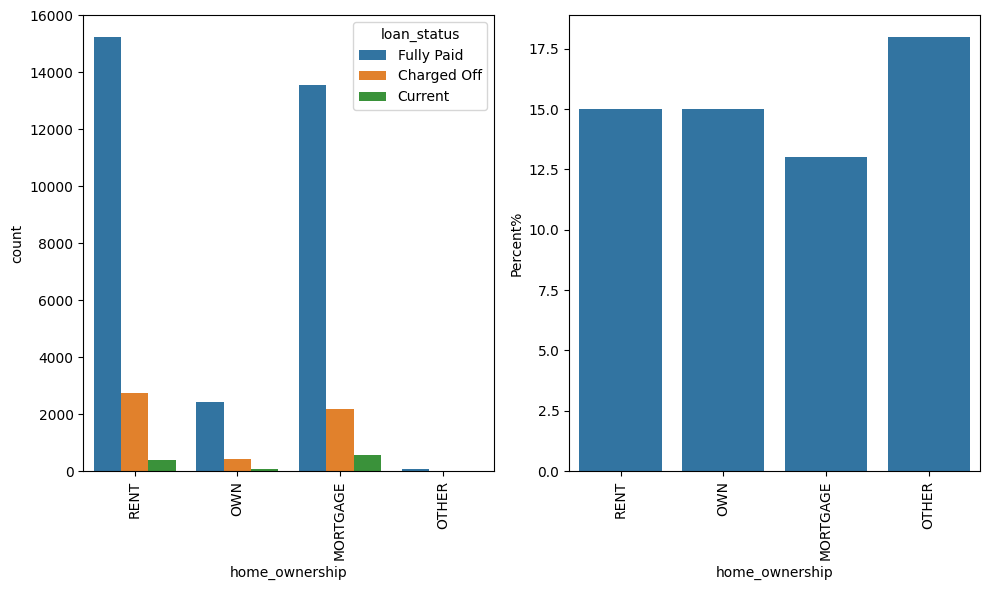

In [74]:

plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.home_ownership,hue=loandf.loan_status,ax=ax[0])

o=loandf.home_ownership.value_counts().index
per=[round((len(loandf[(loandf.home_ownership==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.home_ownership==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

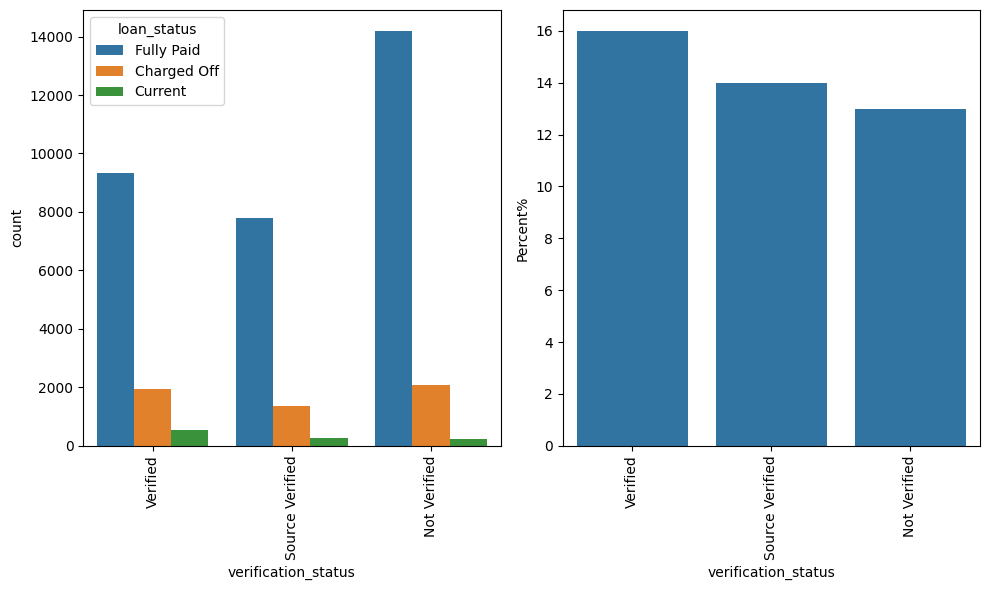

In [75]:

plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.verification_status,hue=loandf.loan_status,ax=ax[0])

o=loandf.verification_status.value_counts().index
per=[round((len(loandf[(loandf.verification_status==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.verification_status==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='home_ownership', ylabel='count'>

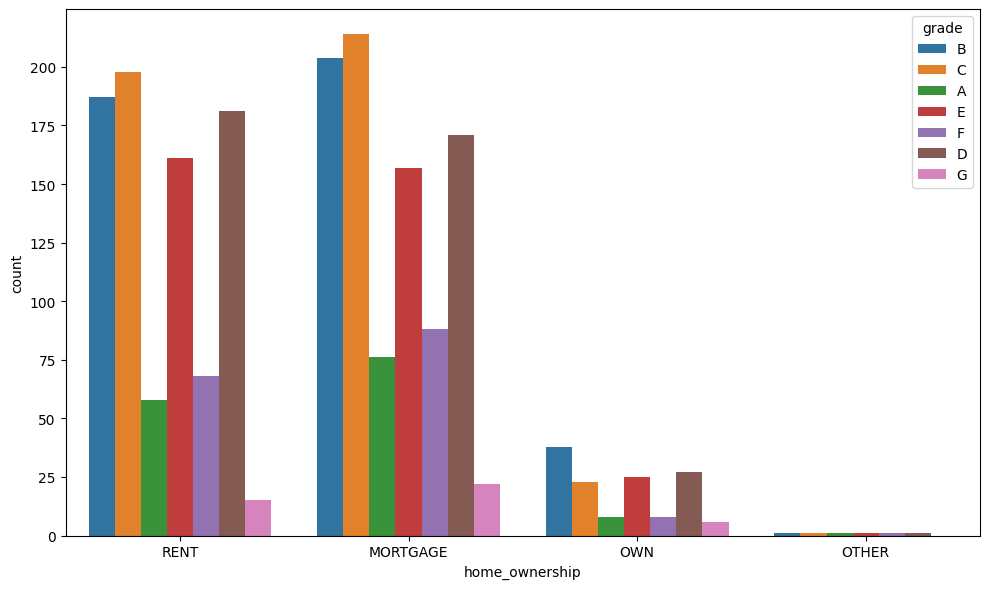

In [76]:
ch=loandf[(loandf.loan_status=="Charged Off") & (loandf.verification_status=="Verified")]
sns.countplot(x=ch.home_ownership,hue=loandf.grade)

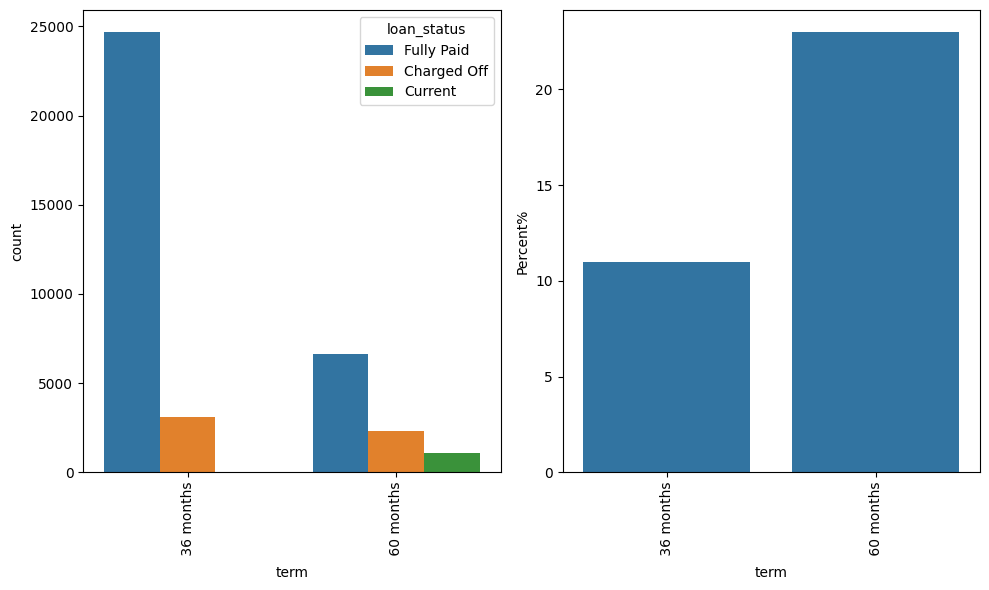

In [77]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.term,hue=loandf.loan_status,ax=ax[0])

o=loandf.term.value_counts().index
per=[round((len(loandf[(loandf.term==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.term==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

In [78]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37777 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37777 non-null  int64  
 1   funded_amnt           37777 non-null  int64  
 2   funded_amnt_inv       37777 non-null  float64
 3   term                  37777 non-null  object 
 4   int_rate              37777 non-null  float64
 5   grade                 37777 non-null  object 
 6   sub_grade             37777 non-null  object 
 7   emp_length            37777 non-null  object 
 8   home_ownership        37777 non-null  object 
 9   annual_inc            37777 non-null  float64
 10  verification_status   37777 non-null  object 
 11  issue_d               37777 non-null  object 
 12  loan_status           37777 non-null  object 
 13  purpose               37777 non-null  object 
 14  addr_state            37777 non-null  object 
 15  dti                   37

In [79]:
loandf.int_rate.describe()

count    37777.000000
mean        11.954794
std          3.677562
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         22.740000
Name: int_rate, dtype: float64

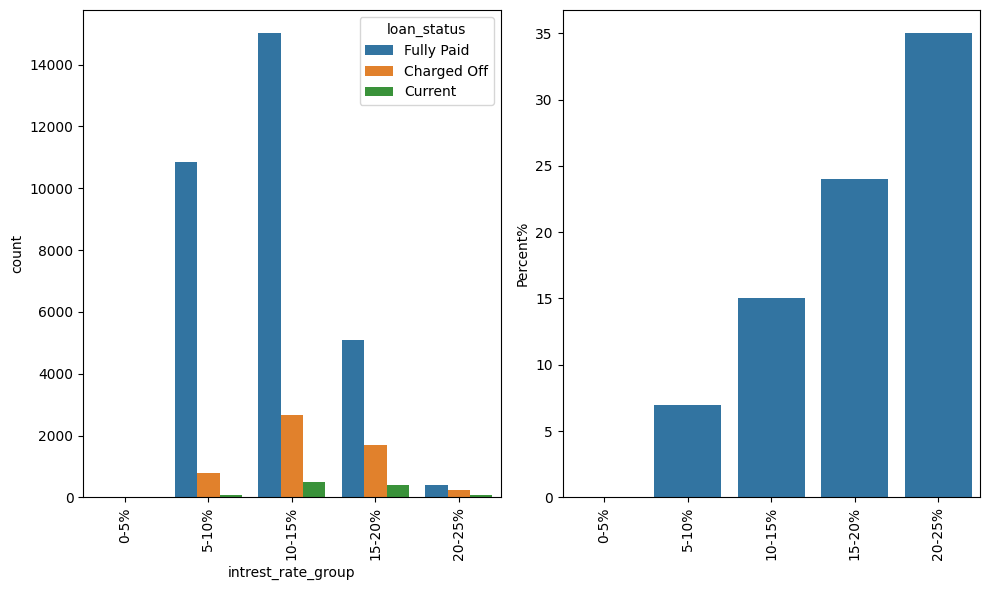

In [80]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.intrest_rate_group,hue=loandf.loan_status,order=["0-5%","5-10%","10-15%","15-20%","20-25%"],ax=ax[0])

o=["5-10%","10-15%","15-20%","20-25%"]
per=[round((len(loandf[(loandf.intrest_rate_group==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.intrest_rate_group==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()


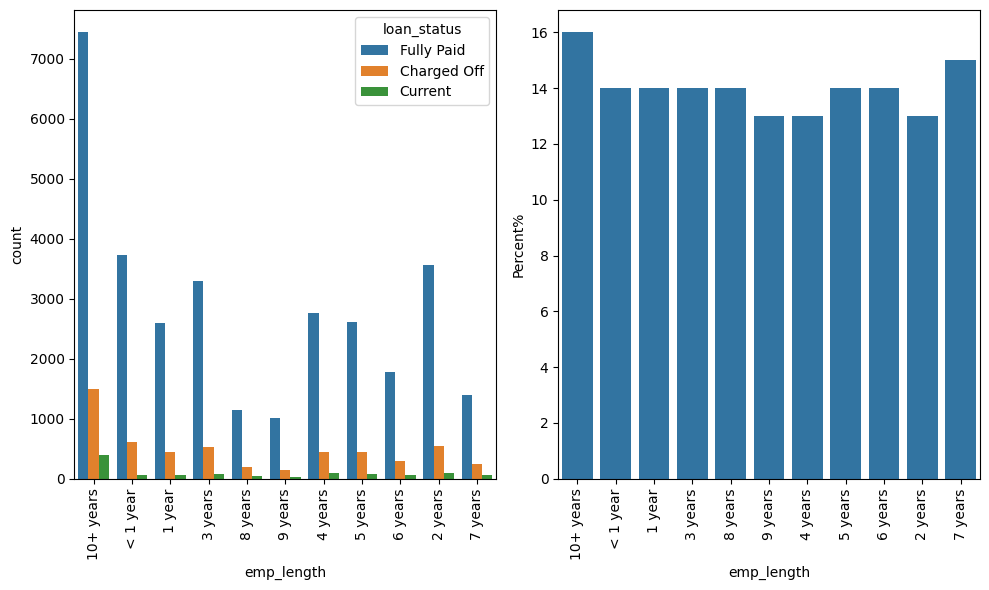

In [81]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.emp_length,hue=loandf.loan_status,ax=ax[0])

o=loandf.emp_length.value_counts().index
per=[round((len(loandf[(loandf.emp_length==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.emp_length==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

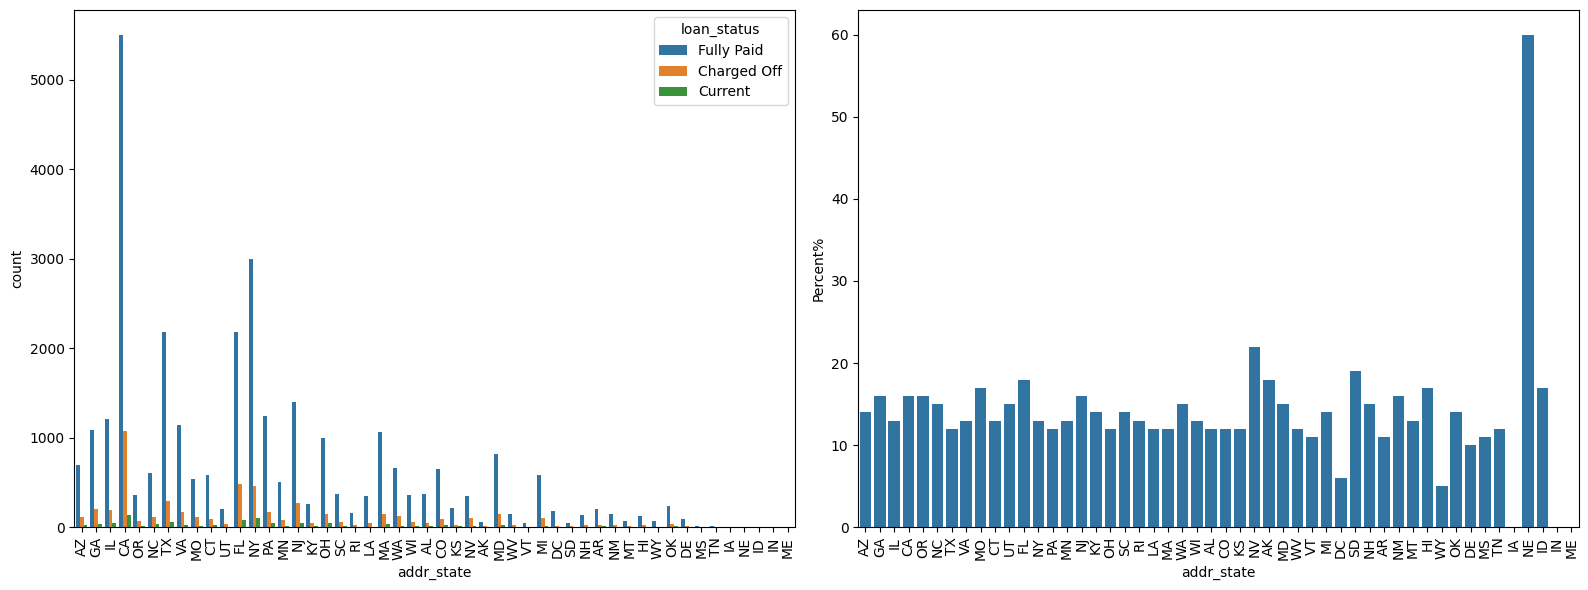

In [82]:
plt.rcParams["figure.figsize"] = [16.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.addr_state,hue=loandf.loan_status,ax=ax[0])

o=loandf.addr_state.value_counts().index
per=[round((len(loandf[(loandf.addr_state==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.addr_state==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

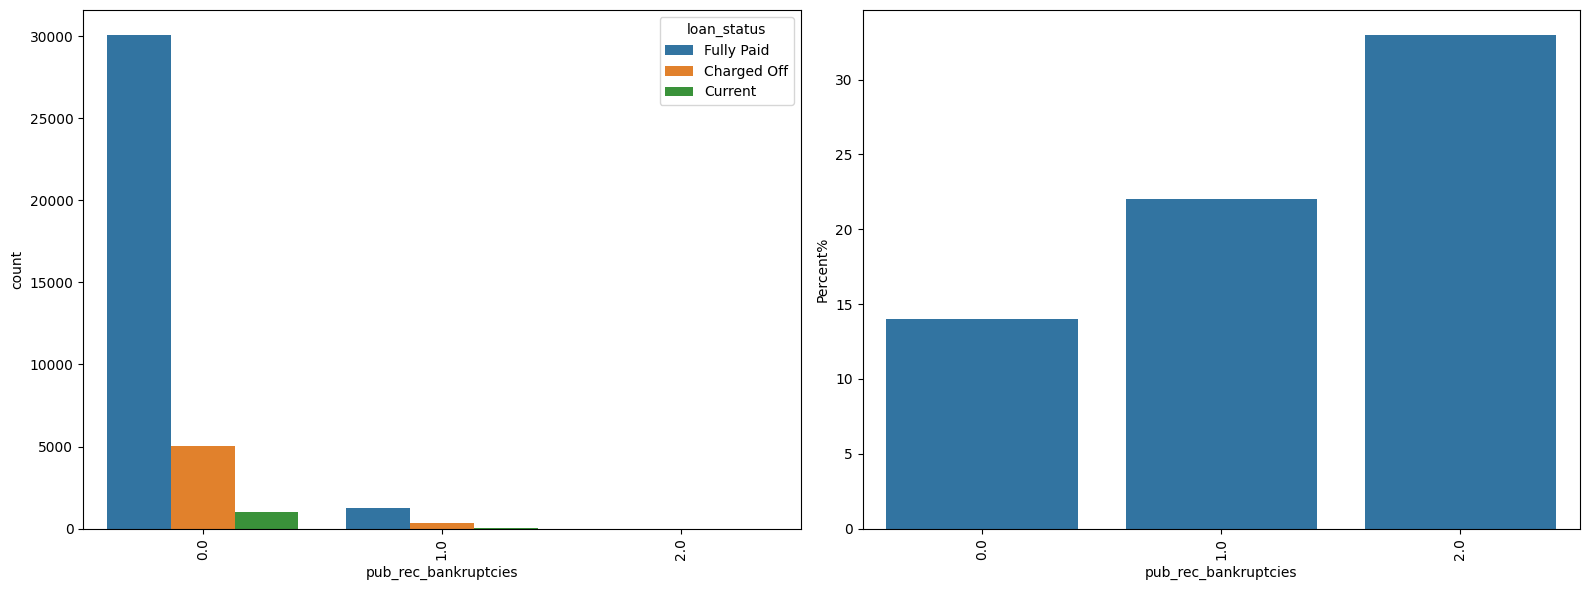

In [83]:
plt.rcParams["figure.figsize"] = [16.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.pub_rec_bankruptcies,hue=loandf.loan_status,ax=ax[0])

o=loandf.pub_rec_bankruptcies .value_counts().index
per=[round((len(loandf[(loandf.pub_rec_bankruptcies ==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.pub_rec_bankruptcies ==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

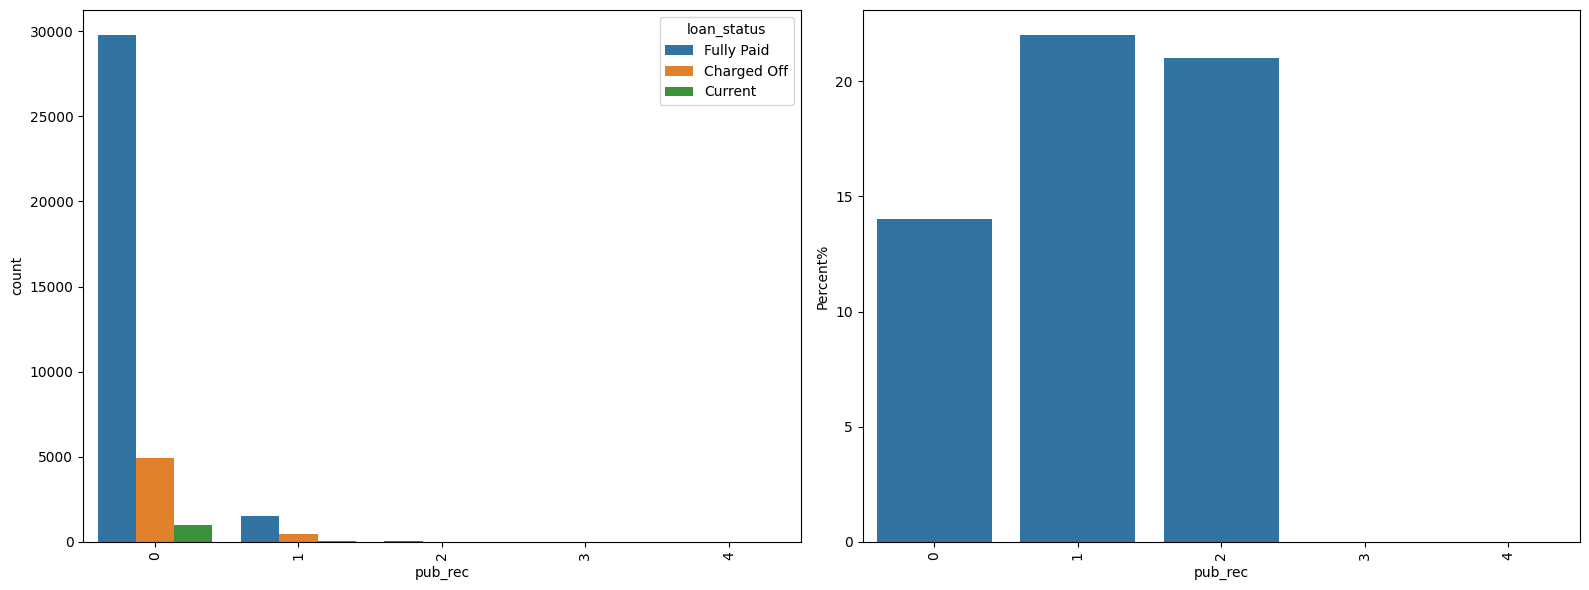

In [84]:
plt.rcParams["figure.figsize"] = [16.00, 6]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(ncols=2,nrows=1,sharex=True,sharey=False)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
sns.countplot(x=loandf.pub_rec,hue=loandf.loan_status,ax=ax[0])

o=loandf.pub_rec.value_counts().index
per=[round((len(loandf[(loandf.pub_rec ==oo) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.pub_rec==oo)]),2)*100 for oo in o]
ax[1].set_ylabel('Percent%')
sns.barplot(x=o,y=per,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

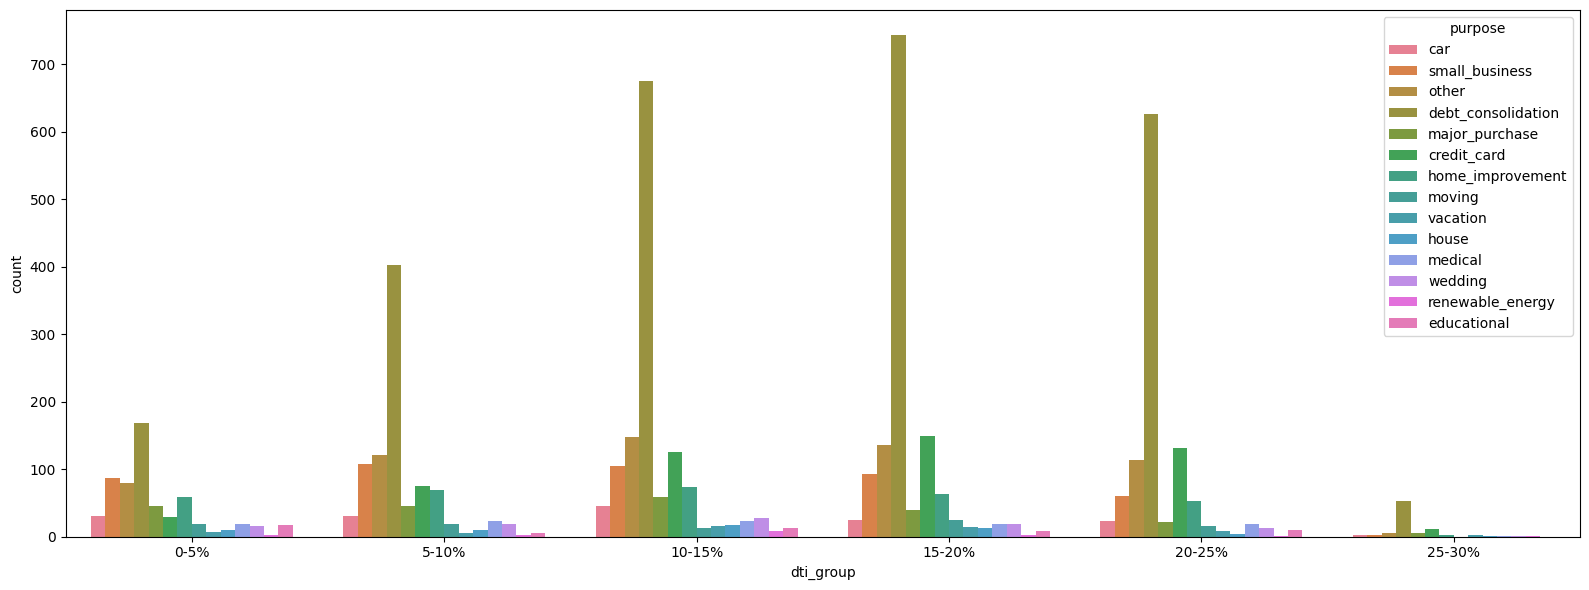

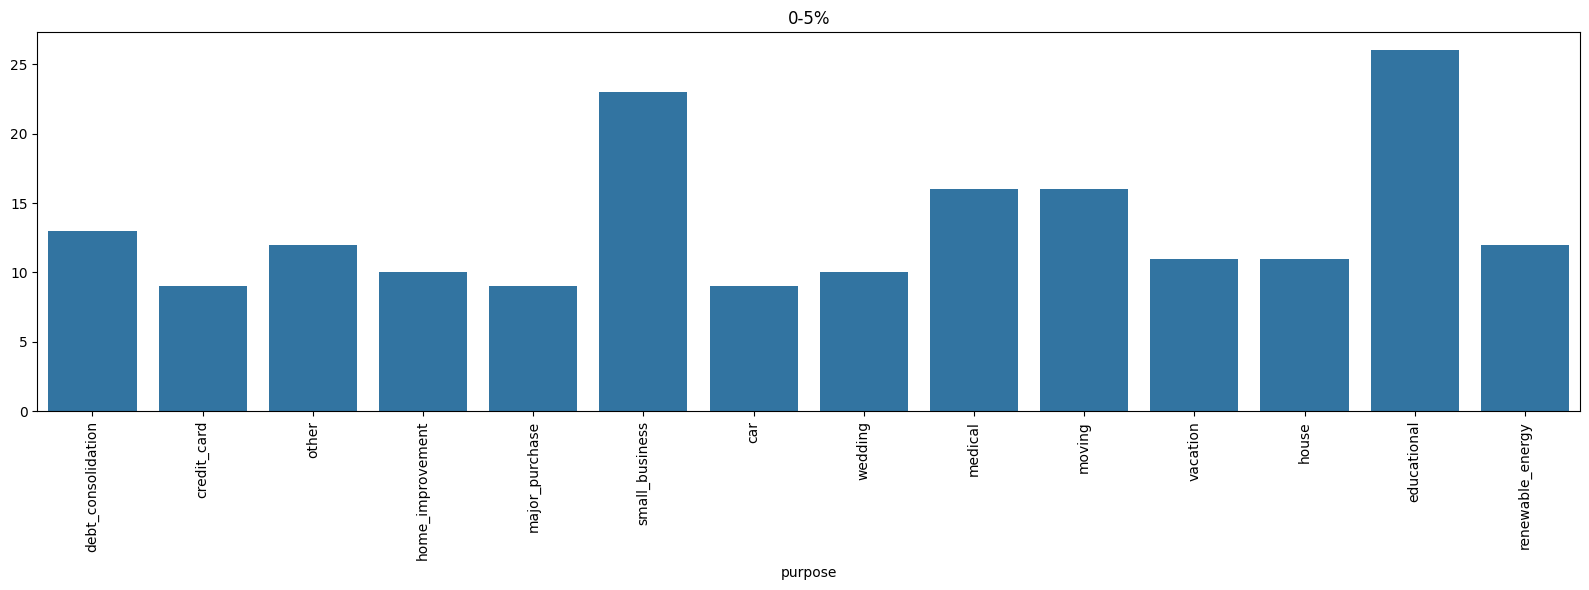

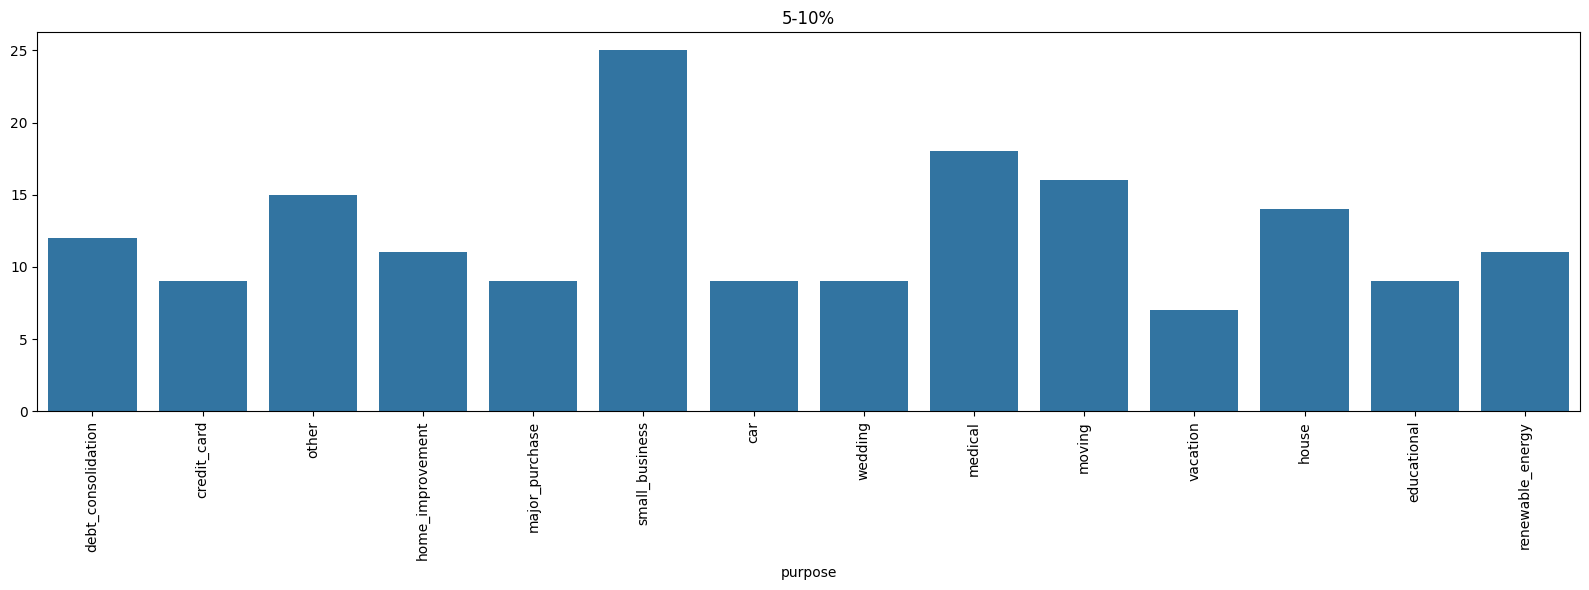

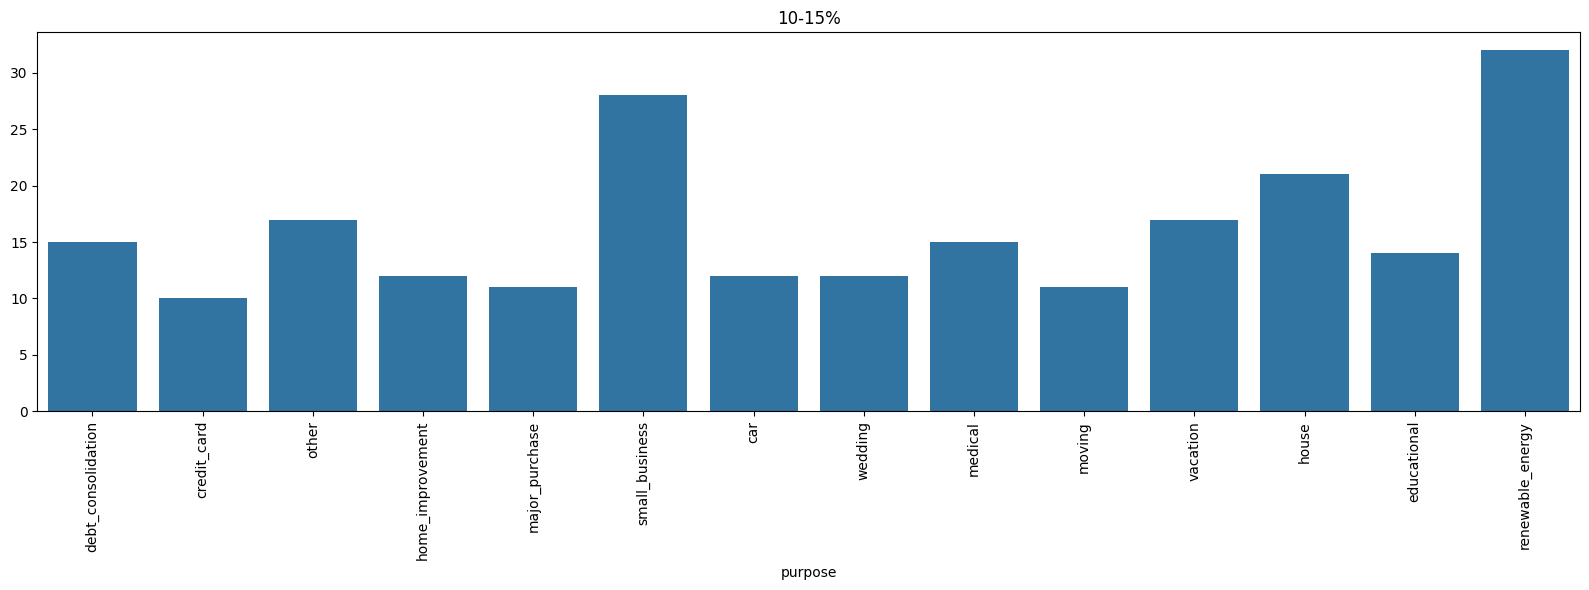

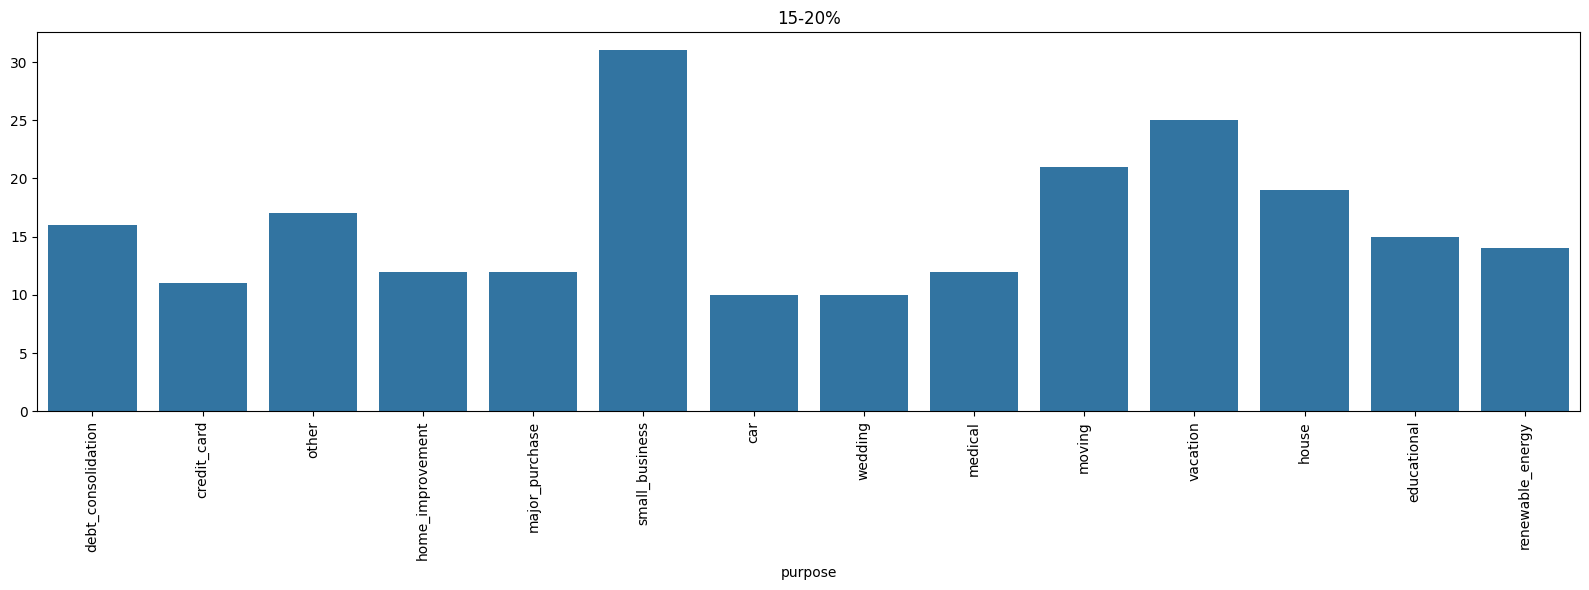

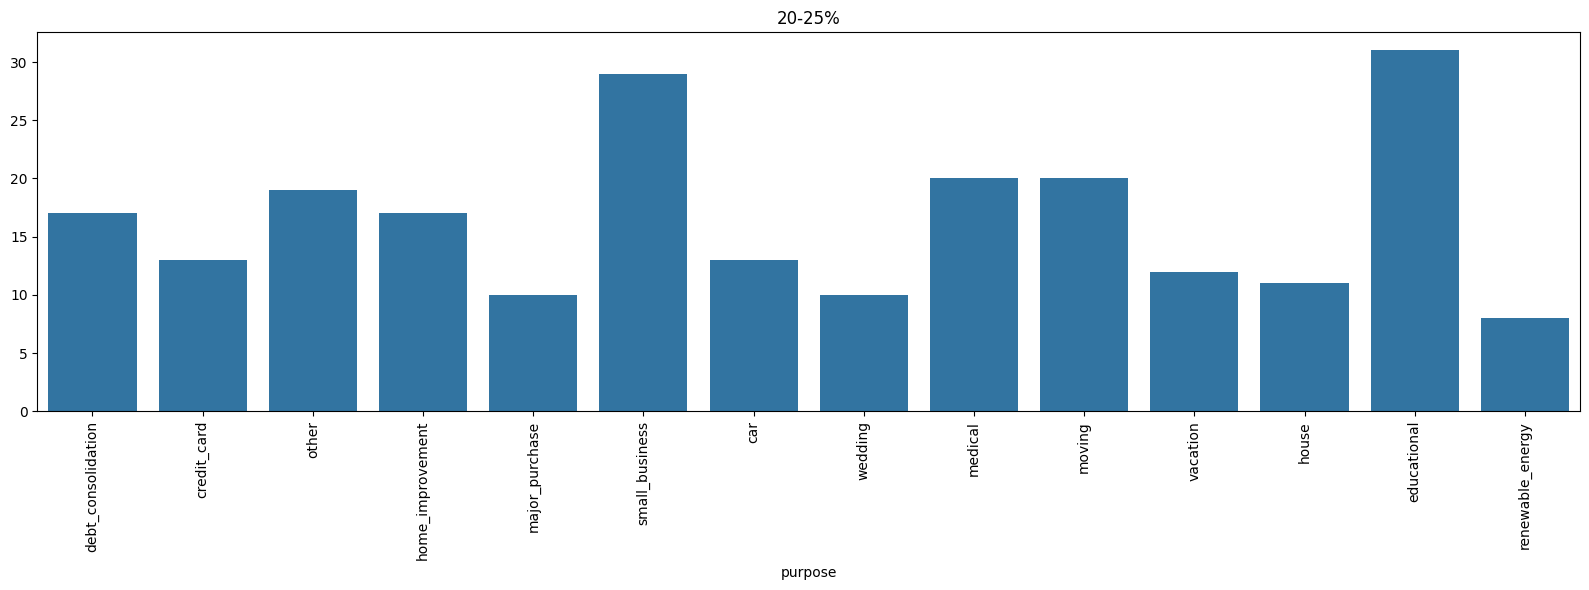

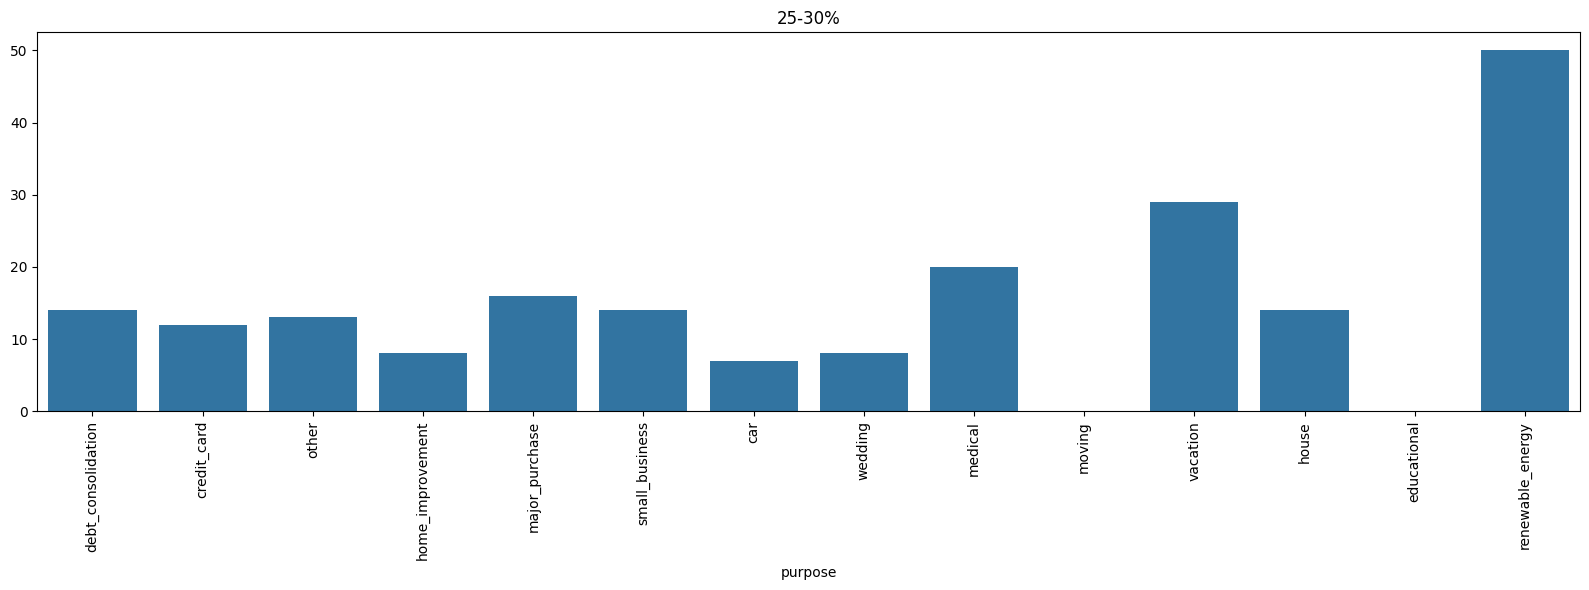

In [85]:
ch=loandf[loandf.loan_status == "Charged Off"]
sns.countplot(x=ch.dti_group,hue=ch.purpose,order=["0-5%","5-10%","10-15%","15-20%","20-25%","25-30%"])
plt.show()
ot=["0-5%","5-10%","10-15%","15-20%","20-25%","25-30%"]
op=loandf.purpose.value_counts().index
for o_ot in ot:
    pp=ch[(ch.dti_group == o_ot)]
    per=[round(len(pp[(pp.purpose == p_op)])/len(loandf[(loandf.dti_group == o_ot)& (loandf.purpose == p_op)]),2)*100 for p_op in op]
    plt.title(o_ot)
    sns.barplot(x=op,y=per)
    plt.xticks(rotation=90)
    plt.show()

      


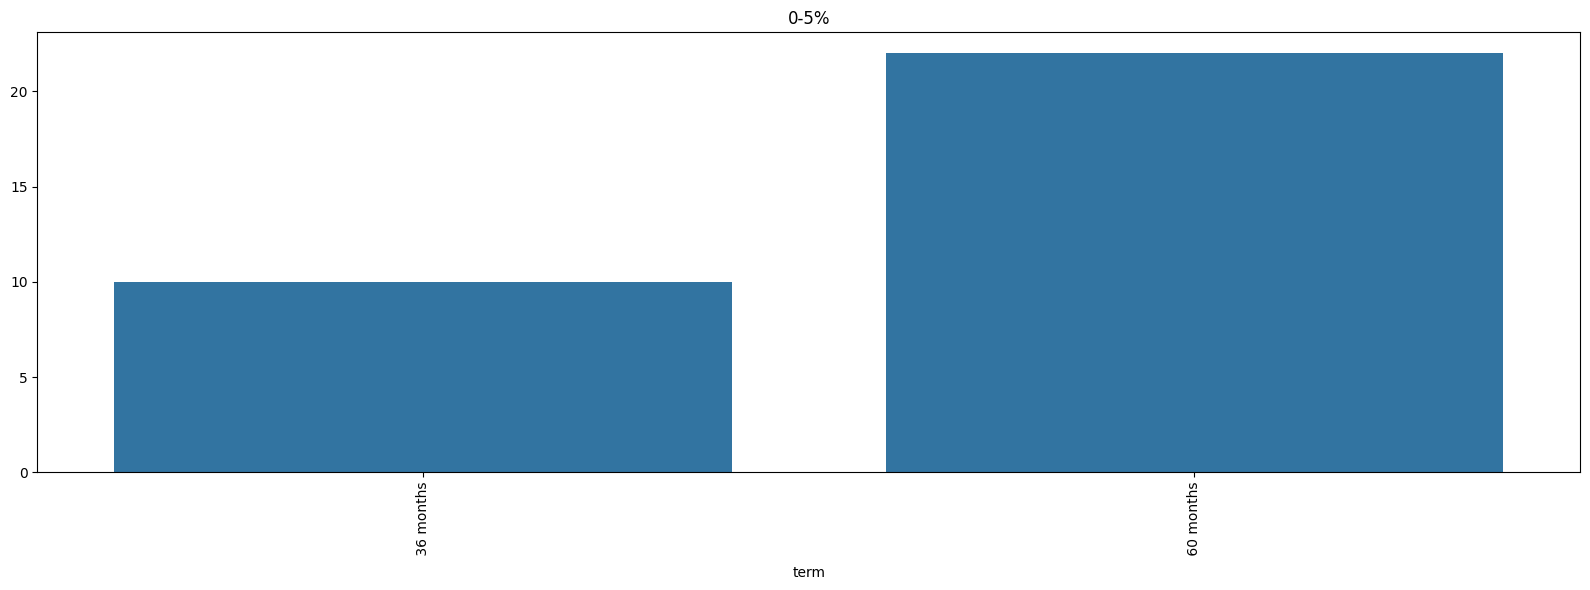

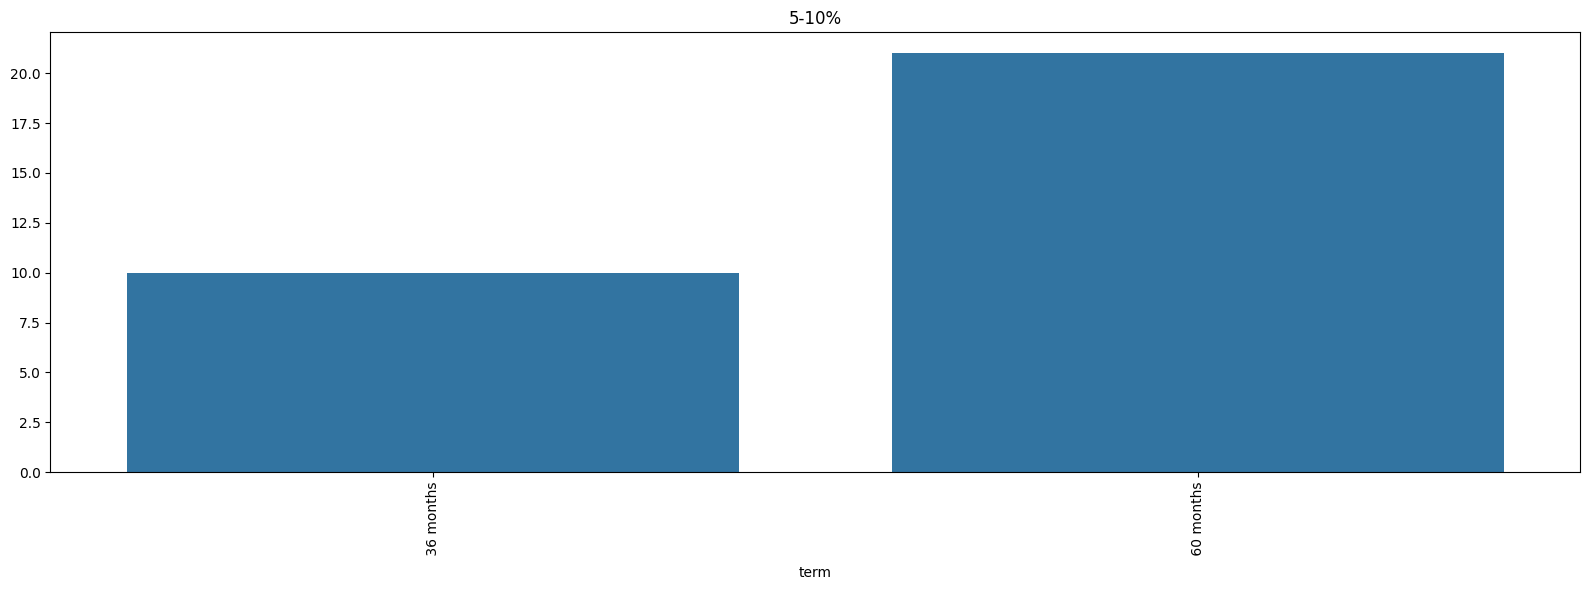

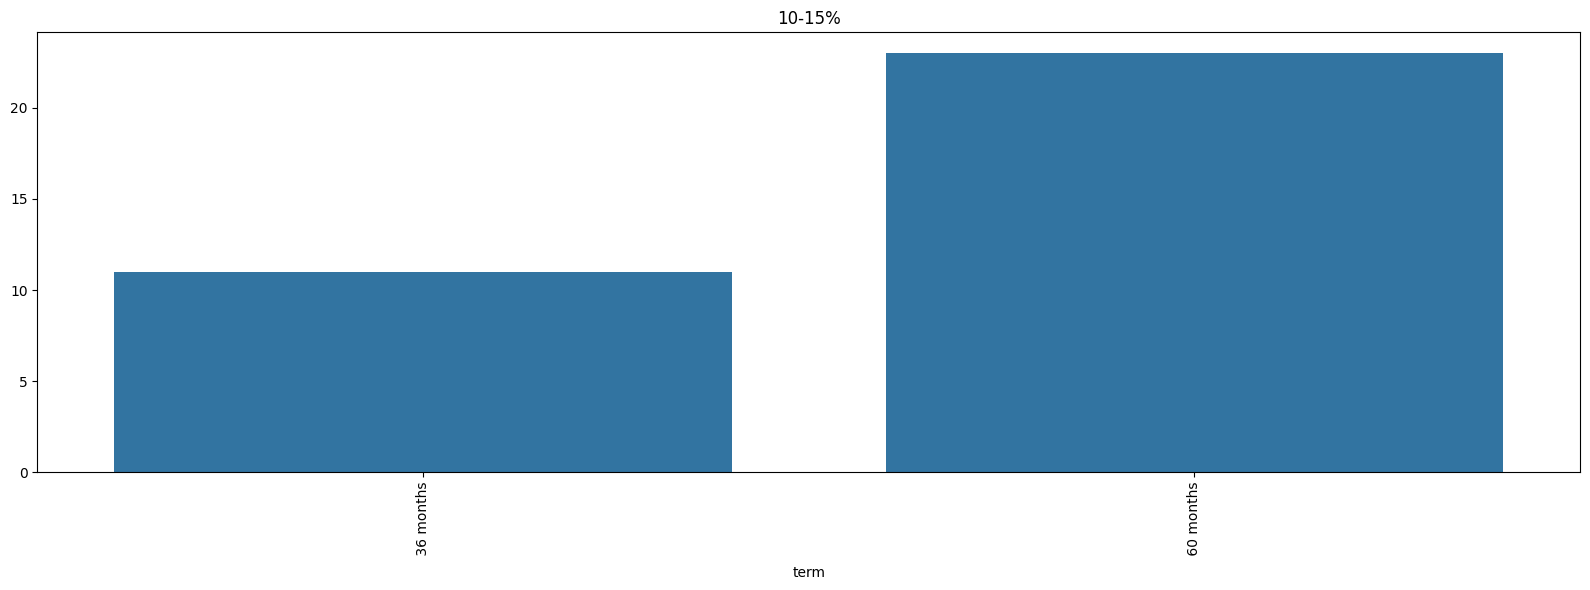

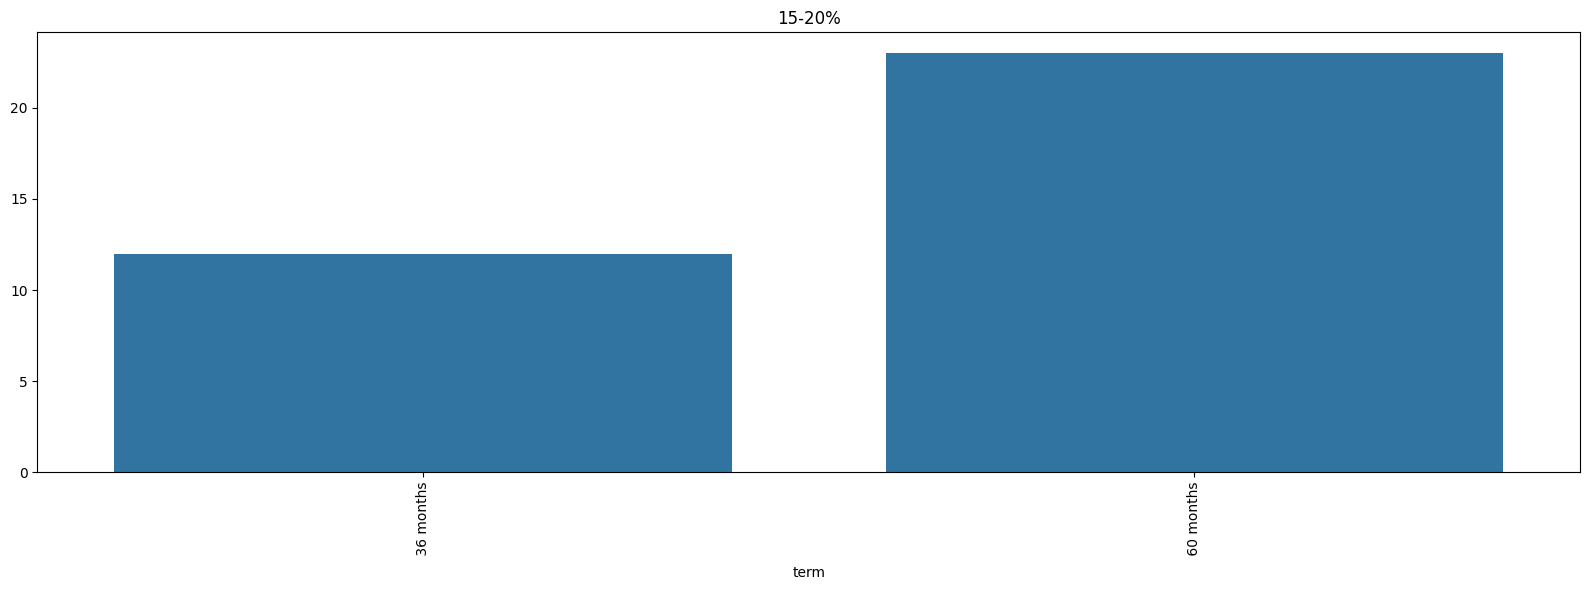

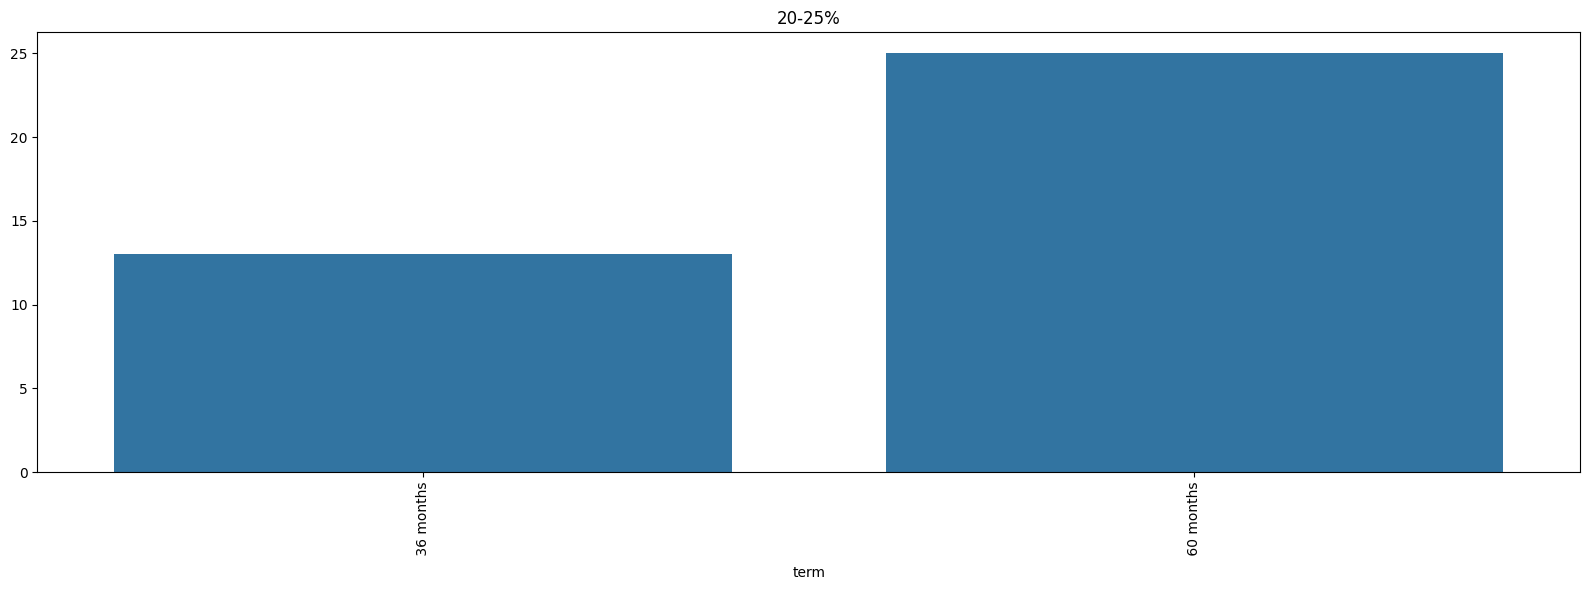

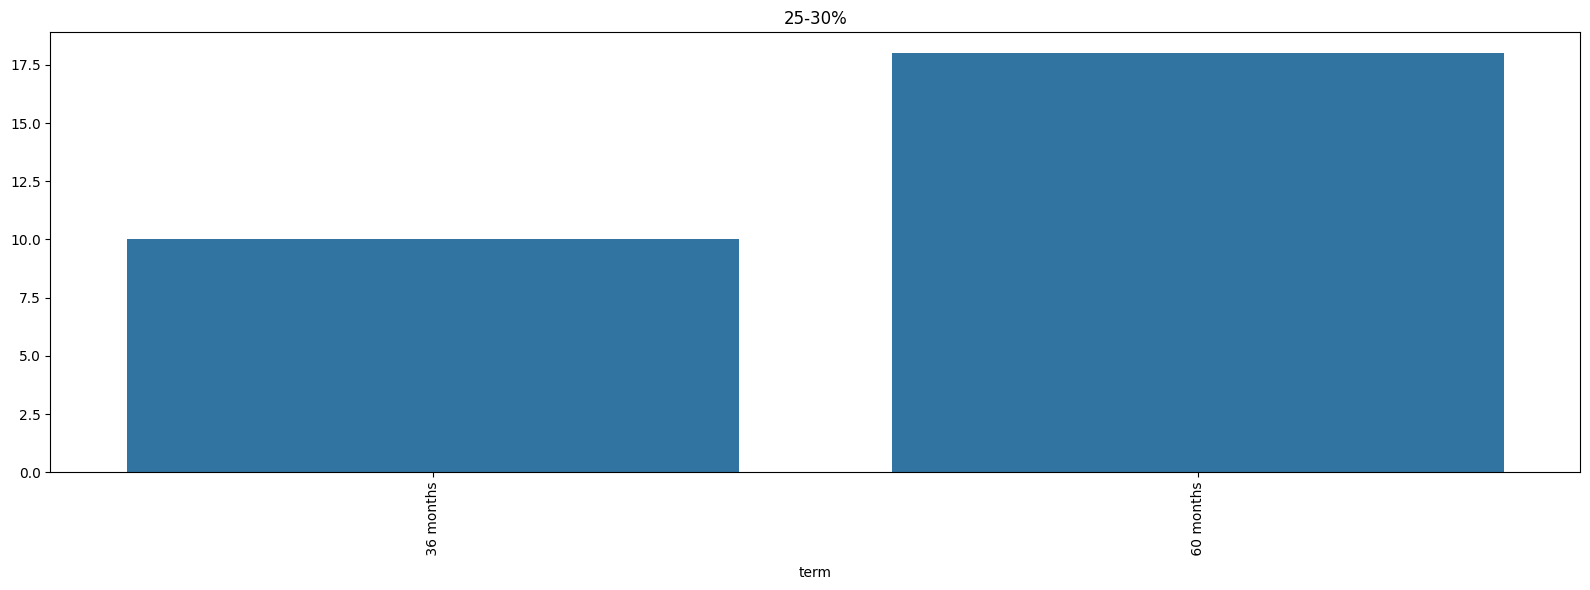

In [86]:
ch=loandf[loandf.loan_status == "Charged Off"]

ot=["0-5%","5-10%","10-15%","15-20%","20-25%","25-30%"]
op=loandf.term.value_counts().index
for o_ot in ot:
    pp=ch[(ch.dti_group == o_ot)]
    per=[round(len(pp[(pp.term == p_op)])/len(loandf[(loandf.dti_group == o_ot)& (loandf.term == p_op)]),2)*100 for p_op in op]
    plt.title(o_ot)
    sns.barplot(x=op,y=per)
    plt.xticks(rotation=90)
    plt.show()

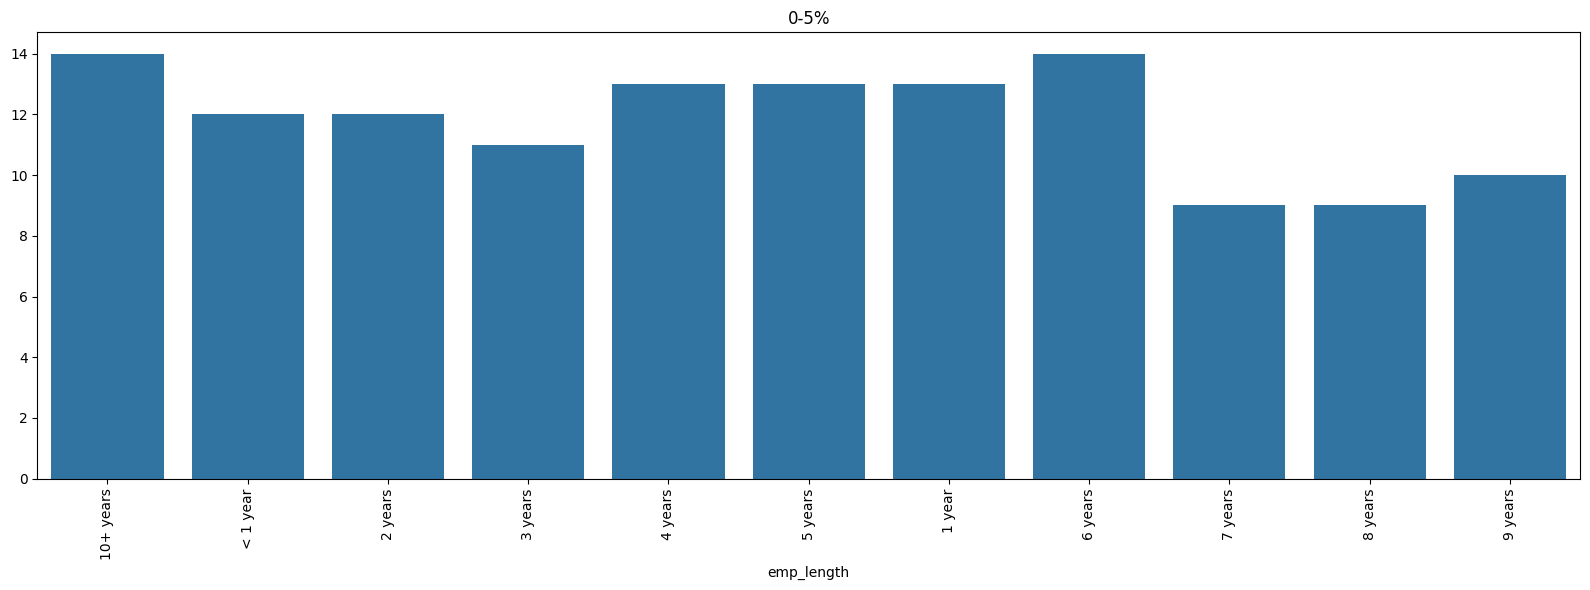

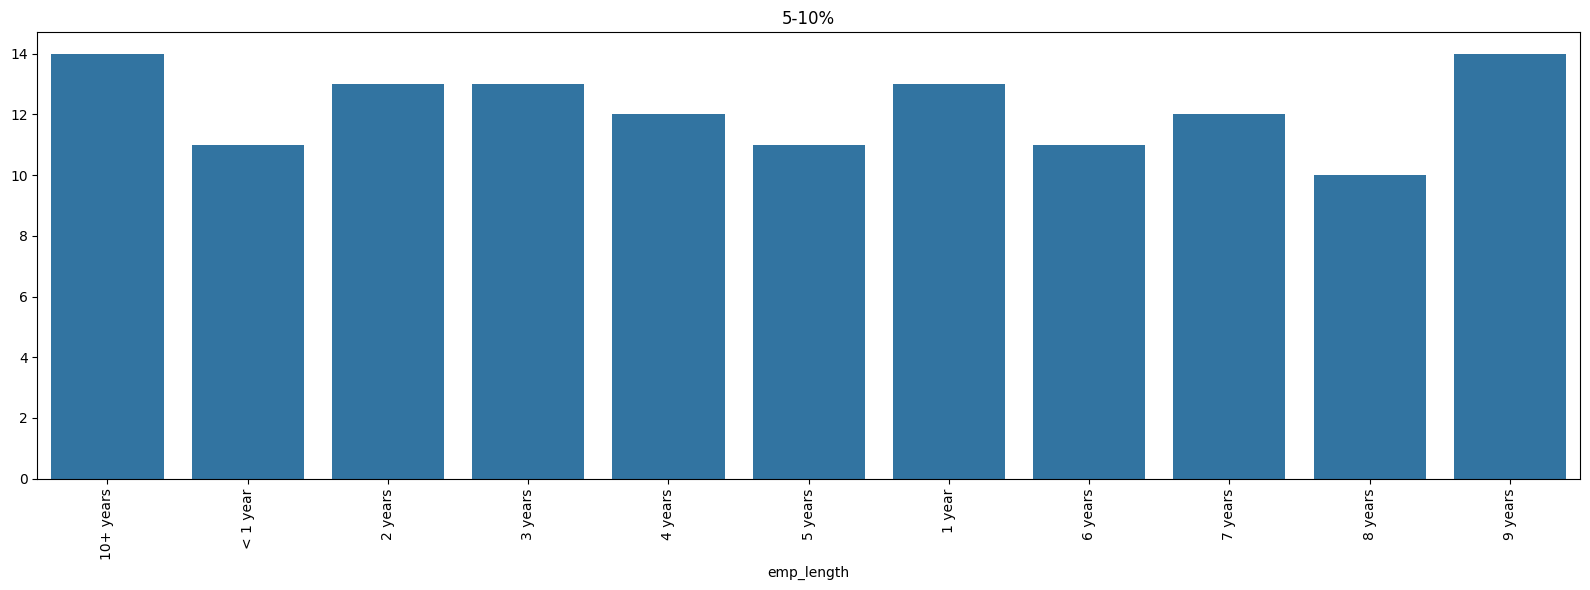

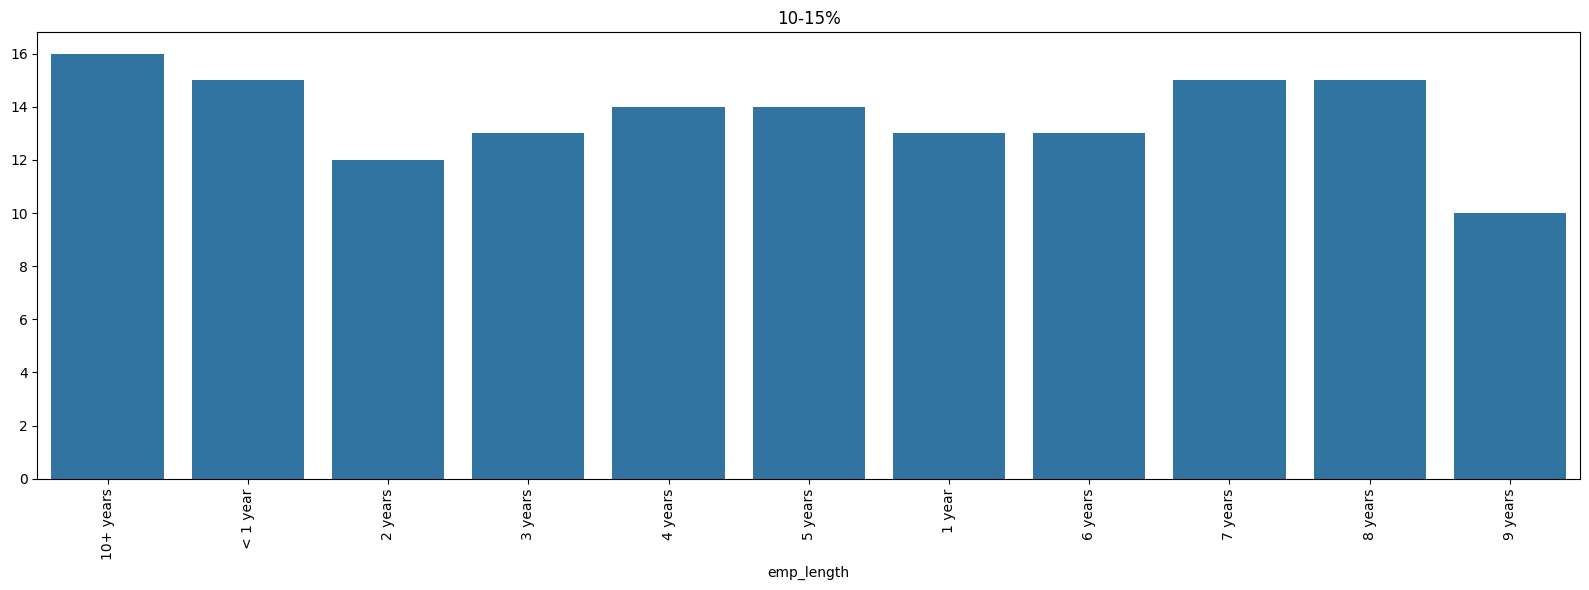

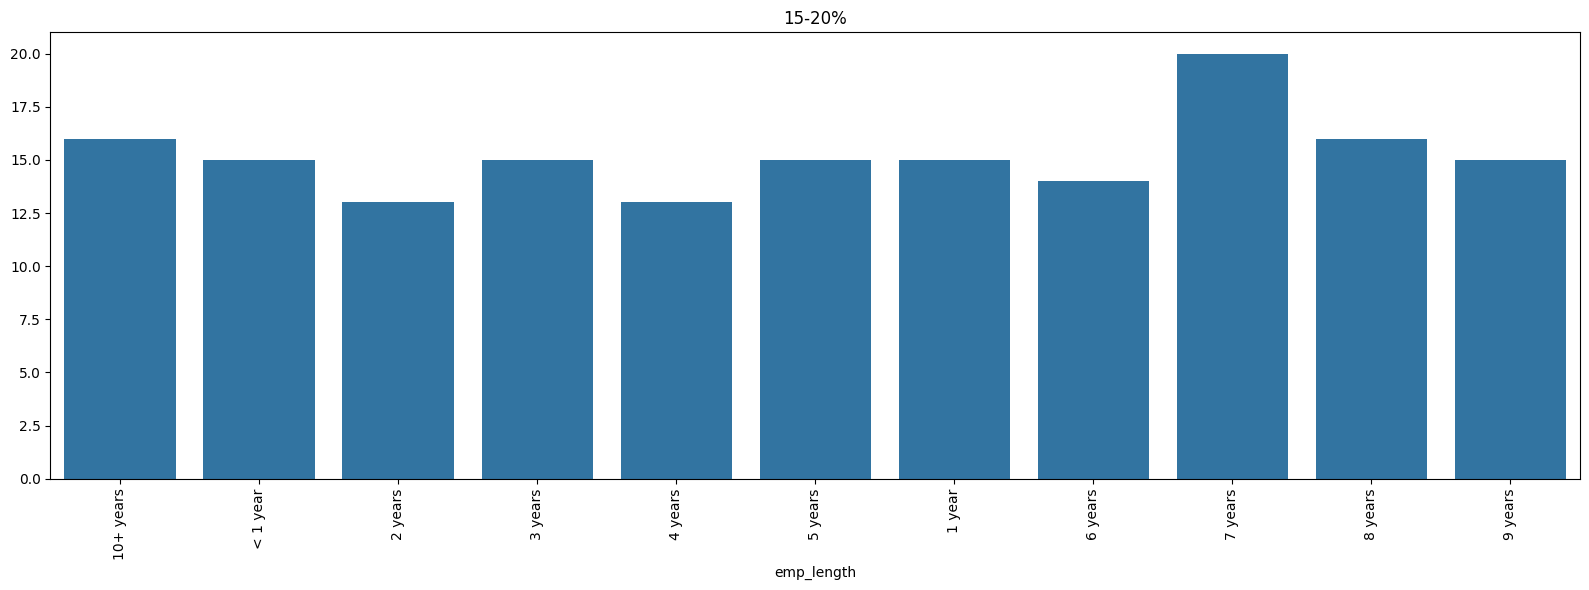

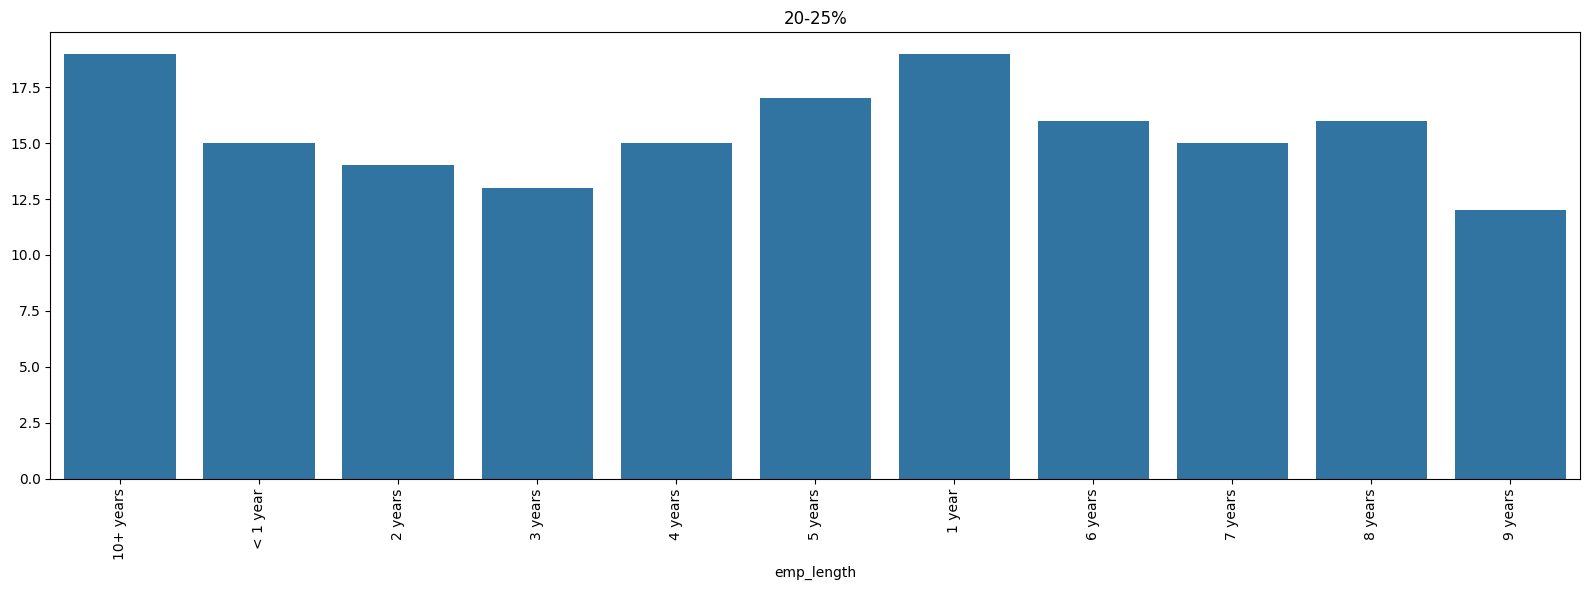

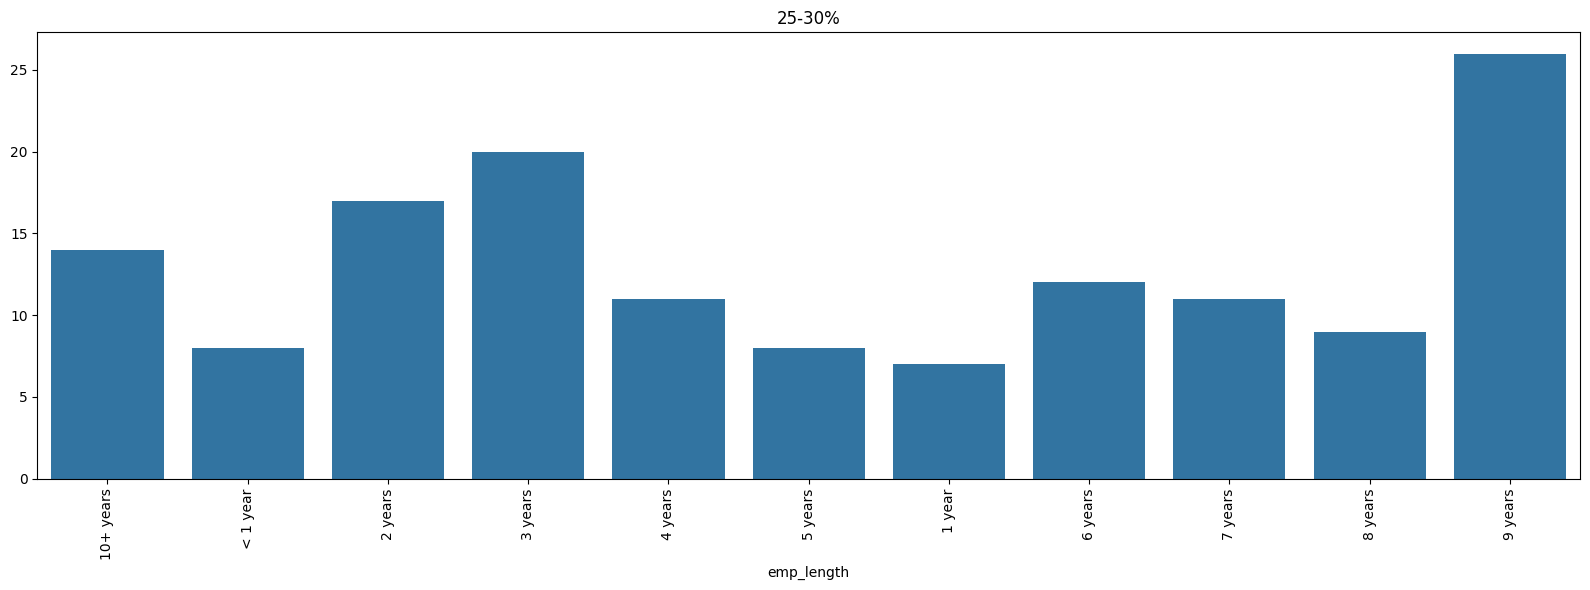

In [87]:
ch=loandf[loandf.loan_status == "Charged Off"]

ot=["0-5%","5-10%","10-15%","15-20%","20-25%","25-30%"]
op=loandf.emp_length.value_counts().index
for o_ot in ot:
    pp=ch[(ch.dti_group == o_ot)]
    per=[round(len(pp[(pp.emp_length == p_op)])/len(loandf[(loandf.dti_group == o_ot)& (loandf.emp_length == p_op)]),2)*100 for p_op in op]
    plt.title(o_ot)
    sns.barplot(x=op,y=per)
    plt.xticks(rotation=90)
    plt.show()